<div align="center">
    <h1> <b>PROYECTO DEL DEPARTAMENTO DE MARKETING</b></h1>
    <h1> <b>SEGMENTACIÓN DE CLIENTES</b></h1>
</div>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


## 1.1 Entendimiento del Negocio

![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

# 1.2 Objetivo del Estudio 

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

## 1.3 Características del Cliente

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y PANORAMA GENERAL DEL DATASET

## 2.1 Importe de librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize # para escalar los datos
from sklearn.cluster import KMeans # para realizar la reducción de dimension
from sklearn.decomposition import PCA # analisis de componmentes principales

## 2.2 Cargar y Leer el Dataset. Configuración de la vista.

In [2]:
# Leer el dataset
df = pd.read_csv("marketing_data.csv")
# A mi me gusta ver todas las columnas, así que realizaré una modificación en la configuración de pandas.
# Esta función recibe dos argumentos: el nombre de la opción y la cantidad de columnas que queremos visualizar. 
pd.set_option('display.max_columns',100) # lo mismo para las filas con max_rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2.3 Leyenda en español de las Columnas.

##### CUSTID: Identificación del titular de la tarjeta de crédito
##### BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
##### BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
##### PURCHASES: Cantidad de compras realizadas desde la cuenta
##### ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
##### INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
##### CASH_ADVANCE: Anticipo otorgado al usuario
##### PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
##### PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
##### CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
##### CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
##### PURCHASES_TRX: número de transacciones de compras realizadas
##### CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
##### PAYMENTS: Número de pagos realizados por el usuario
##### MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
##### PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
##### TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

## 2.4 Primeras descripciones y conclusiones.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Vamos a investigar quien ha hecho una avance en efectivo de 47137.211 $40761!
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [6]:
# Vamos a investigar quien ha hecho una compra de $40761!
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


### Podemos observar que:
##### 1.- El cliente de la compra hizo un total de 123 transacciones por adelantado!!
##### 2.- tiene un saldo cómodo
##### 3.- siempre mantiene un saldo actualizado
##### 4.- ha realizado solo 432 compras vs las 49039 de la persona anterior
##### 5.- pidió mucho dinero 47137
##### 6.- compra un 58% 
##### 7.- siempre compra con tarjeta vs el anterior que nunca lo hace
##### 8.- paga más que la otra persona por adelantado, sin embargo la ota persona solo a pagado una vez por adelantado

### El balance medio es 1564 
##### La frecuencia del balance se actualiza bastante a menudo, en promedio 0.9
##### El promedio de las compras es 1000
##### El importe máximo de compra no recurrente es en promedio 600
##### El promedio de la frecuencia de las compras está cerca de 0.5
##### El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
##### El promedio del límite de crédito es 4500
##### El porcentaje de pago completo es 15%
##### Los clientes llevan de promedio en el servicio 11 años

# TAREA #3: VISUALIZACIÓN DEL DATASET

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3.1 Revisión e imputación de nulos 

### 3.1.1 Hallar nulos

In [8]:
df.isna().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

### 3.1.2 Mapa de calor de nulos

<AxesSubplot: >

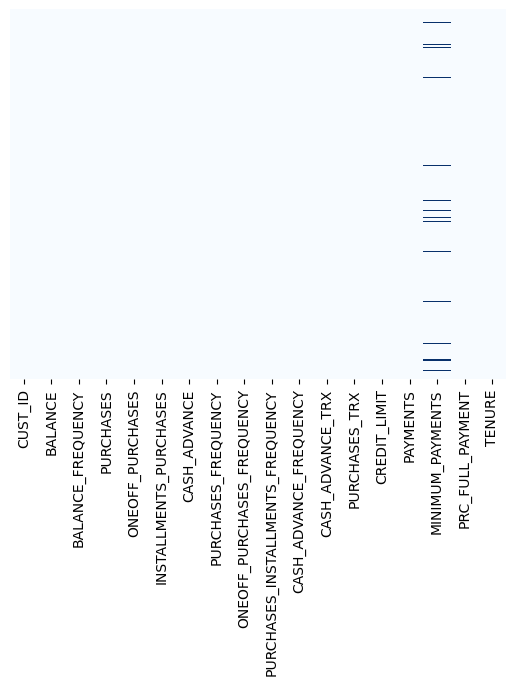

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

### 3.1.3 Imputación de nulos
##### Existen dos formas de hacerlo:
##### 1.- Solo para datos numéricos y se reemplaza directamente el promedio en los datos nulos.
##### 2.- Para datos numéricos o categóricos. Se obtiene el promedio (numérico) o la moda (categórico) y se reemplazan los nulos por ese valor.

In [10]:
# Forma 1
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [11]:
# Forma 2
df['MINIMUM_PAYMENTS'].mean()

864.2065423050761

In [12]:
# Forma 2
df['CREDIT_LIMIT'].mean()

4494.449450364622

In [13]:
# Forma 2
# Reemplazo en datos nulos de MINIMUM_PAYMENTS y CREDIT_LIMIT
#data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].replace(np.nan,864.2065422944161)
#data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].replace(np.nan,4494.449450364581)

In [14]:
# comprobar:
df.isna().sum().sort_values(ascending = False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

## 3.2 Datos duplicados

In [15]:
df.duplicated().sum()

0

## 3.3 Eliminar datos inservibles

In [16]:
# Podemos deshacernos del campo Customer ID porque no posee valor estadístico
df.drop(['CUST_ID'], axis=1, inplace = True)

In [17]:
# Revisar
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3.4 Transformar columnas de Yes/No en 1 y 0

In [18]:
# No existen este tipo de columnas :)

## 3.5 Observación de las columnas (variables, atributos, etc)

In [19]:
# Cantidad de columnas
cantidad_columnas = len(df.columns)
cantidad_columnas

17

In [20]:
# Nombre de cada columna
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## 3.6 Graficos de frecuencia

### 3.6.1 Gráfico KERNEL DENSITY ESTIMATE o gráfico de densidad de probabilidad de variable continua

C:\Users\Danko\AppData\Local\Temp\ipykernel_12536\2968778622.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label': 'KDE'}, hist_kws = {'color':'b'})
C:\Users\Danko\AppData\Local\Temp\ipykernel_12536\2968778622.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

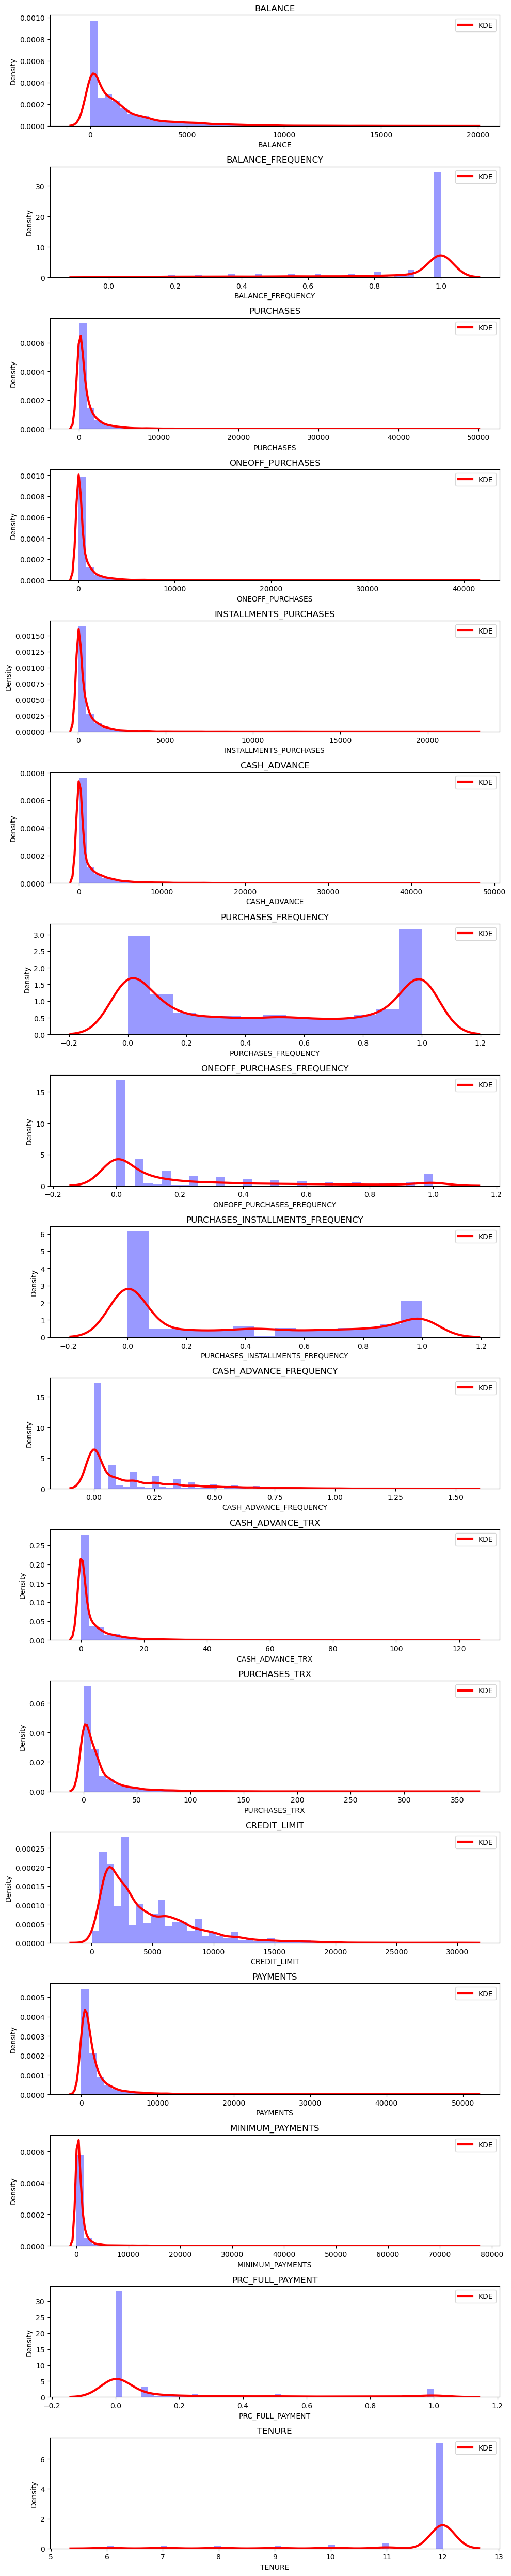

In [21]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

plt.figure(figsize=(10,50))
for i in range(cantidad_columnas):
    plt.subplot(cantidad_columnas,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label': 'KDE'}, hist_kws = {'color':'b'})
    plt.title(df.columns[i])

    plt.tight_layout()
    plt.legend()

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio


### 3.6.2 Mapa Global

array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

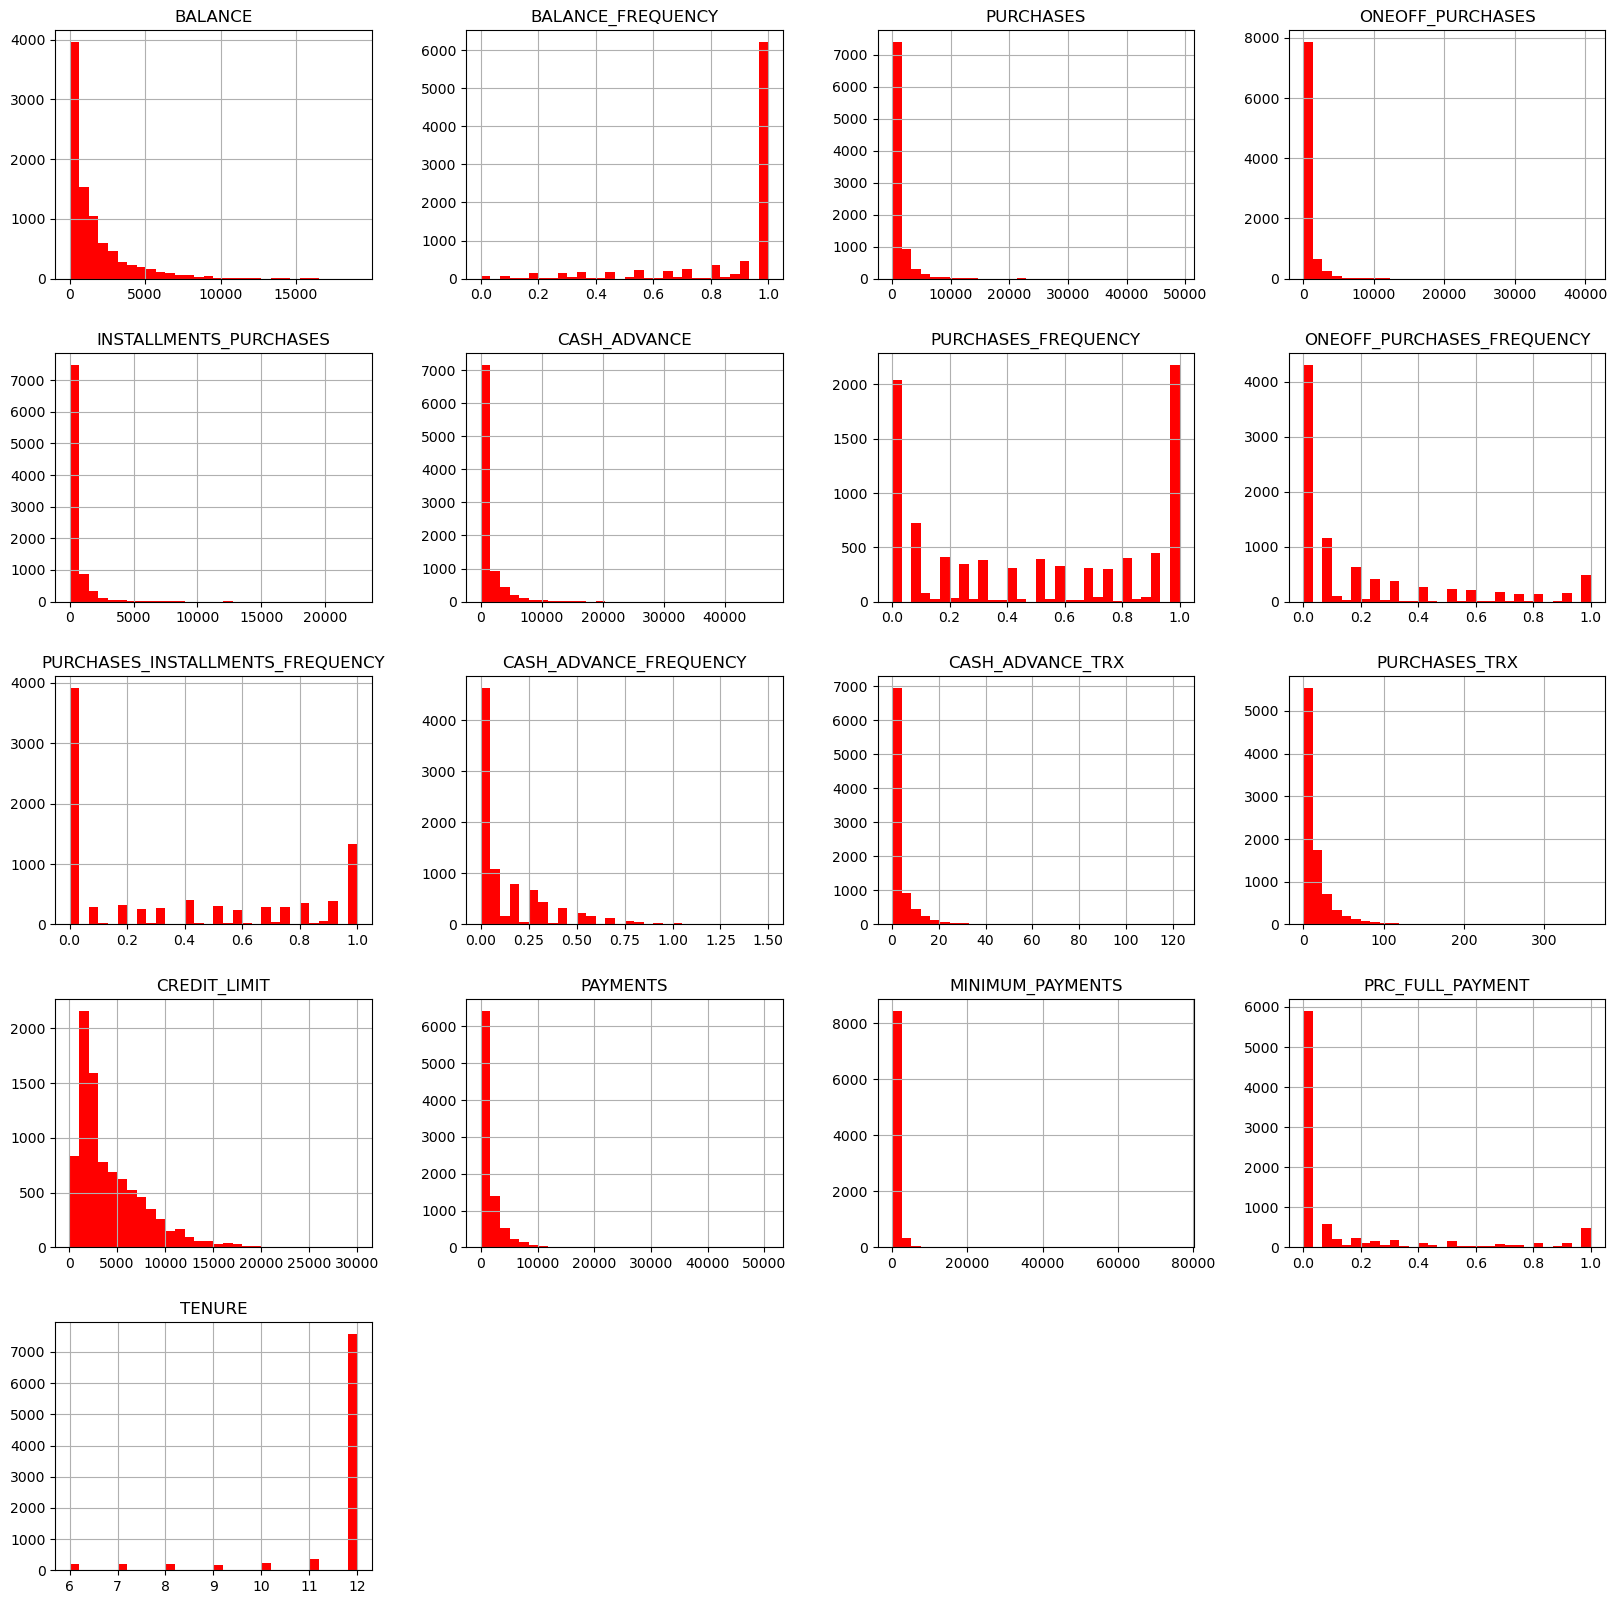

In [22]:
# Ahora que tenemos la seguridad de que no hay datos nulos, realizaremos un mapa global de nuestros datos.
df.hist(bins = 30, figsize = (20, 20), color ='r')

## 3.7 Correlaciones

### 3.7.1 Matriz de Correlación

<AxesSubplot: >

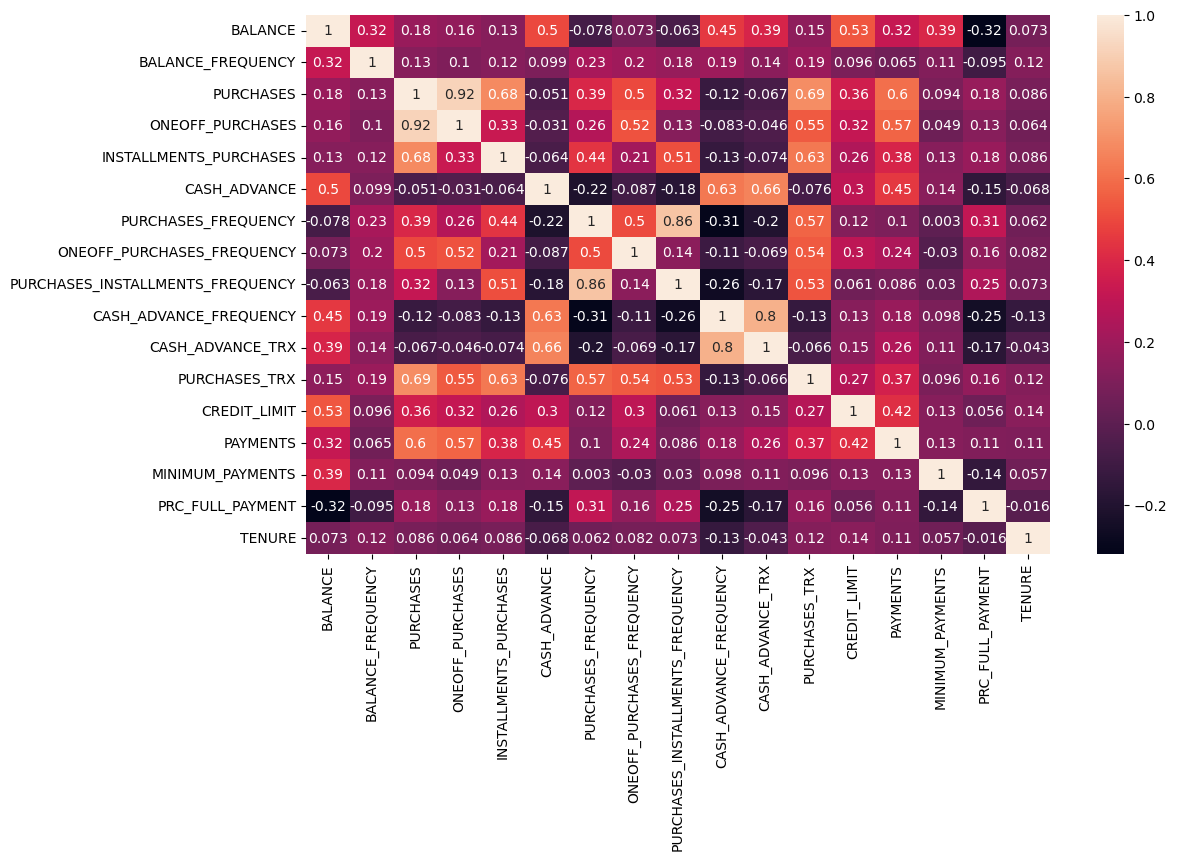

In [23]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (12,7)) # grafico en forma de mapa de calor
sns.heatmap(correlations, annot = True) # Pintar las correlations

### 3.7.2 Observaciones en la Matriz

##### 1.- ONEOFF_PURCHASES está altamente correlacionado PURCHASES
##### 2.- PURCHASES_INSTALLMENTS_FREQUENCY está altamente correlacionado con PURCHASES_FREQUENCY
##### 3.- CASH_ADVANCE_TRX está altamente correlacionado con CASH_ADVANCE_FREQUENCY

### 3.7.3 Correlaciones graficadas

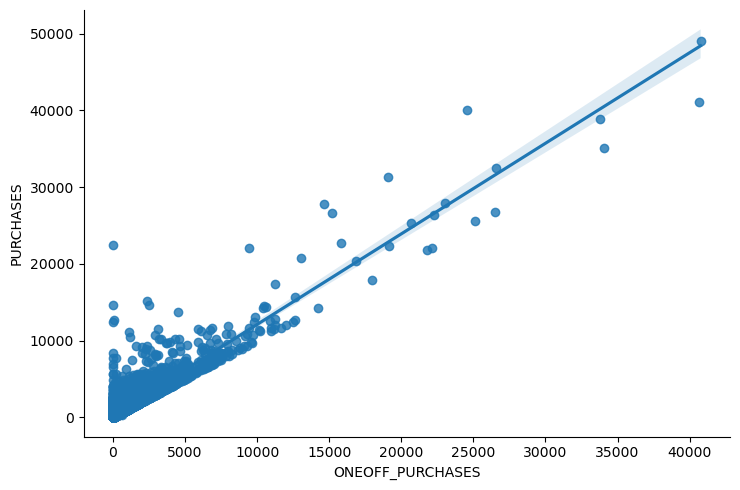

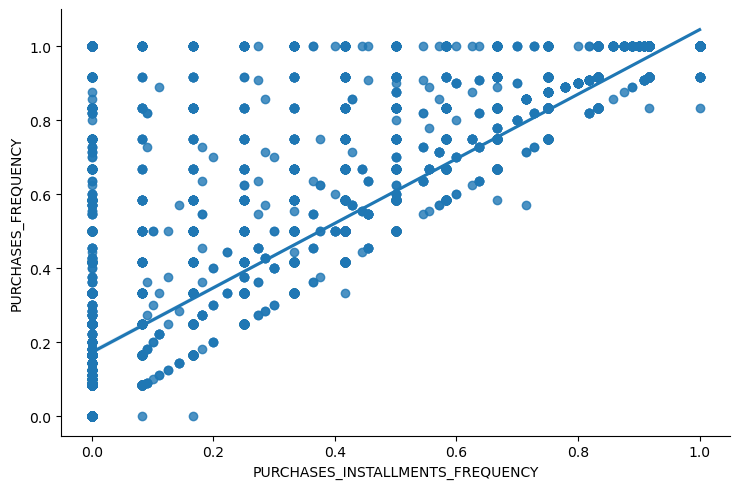

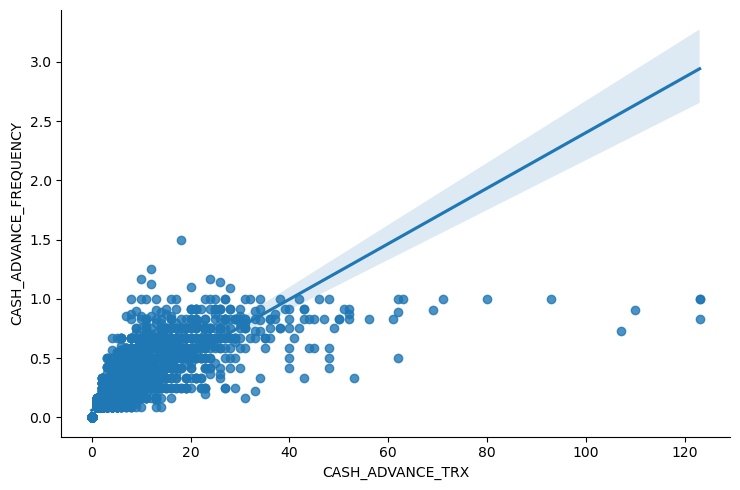

In [24]:
sns.lmplot(x ='ONEOFF_PURCHASES', y ='PURCHASES', data = df, aspect = 1.5,palette = 'rainbow')
sns.lmplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', y='PURCHASES_FREQUENCY', data = df, aspect = 1.5,palette = 'rainbow')
sns.lmplot(x='CASH_ADVANCE_TRX', y='CASH_ADVANCE_FREQUENCY', data = df, aspect = 1.5,palette = 'rainbow')

# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO DE JAMBU

## 5.1 Escalar el dataset


In [25]:
# Los números de cada variable son muy distintos entre si, por lo tanto:
scaler = StandardScaler() # escalar variables
df_scaled = scaler.fit_transform(df)

In [26]:
df_scaled.shape

(8950, 17)

In [27]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## 5.2 Graficar el codo de jambú

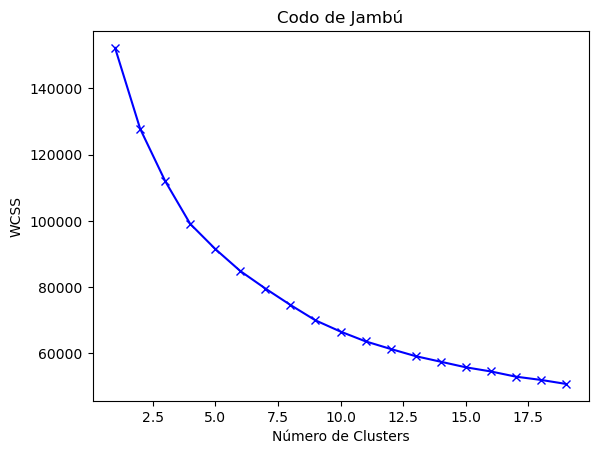

In [28]:
wcss1 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_scaled) # Aquí anota que aplica K-means a la base de datos
    wcss1.append(kmeans.inertia_)

plt.plot(range(1,20),wcss1, 'bx-')
plt.title('Codo de Jambú')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

## 5.3 Observaciones y Conclusión.
#### Con el gráfico podemos ver que en x = 4 es donde se forma el codo de la curva.
#### Sin embargo, los valores no se reducen a una forma lineal hasta x = 8. 
#### Por lo tanto usaremos 7 u 8 clusters.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

## 6.1 Crear el modelo de entrenamiento

In [29]:
kmeans = KMeans(8) # creación modelo
kmeans.fit(df_scaled) # entrenamiento del modelo
labels = kmeans.labels_ # guardamos las etiquetas que creó el modelo en labels

## 6.2 Ver los Clusters

In [30]:
# Ver los labels
labels

array([1, 2, 0, ..., 6, 6, 6])

In [31]:
# Ver cantidad de etiquetas creadas
labels.shape

(8950,)

In [32]:
# Etiqueta menor
labels.min()

0

In [33]:
# Etiqueta mayor
labels.max()

7

In [34]:
# Ver los 8 baricentros de cada cluster
kmeans.cluster_centers_.shape # muestra en este caso las 8 observaciones x 17 valores

(8, 17)

In [35]:
# Ver los centros de cada cluster
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])      
cluster_centers # cada fila del siguiente set sería un centroide del clustering

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.141897,0.430527,0.975026,0.924141,0.607604,-0.306847,1.098345,1.878444,0.545696,-0.407155,-0.316761,1.224065,0.720442,0.413279,-0.047255,0.468948,0.307390
1,0.007735,0.401487,-0.344034,-0.224459,-0.400981,-0.102456,-0.813659,-0.334444,-0.757732,0.088307,-0.039474,-0.465770,-0.300403,-0.247951,-0.046100,-0.452203,0.271445
2,1.653909,0.392268,-0.200820,-0.145718,-0.207210,2.008005,-0.449397,-0.180820,-0.401410,1.931518,1.942354,-0.234680,1.011280,0.846570,0.390190,-0.388390,0.067876
3,1.488505,0.403475,7.413638,6.553369,5.486972,0.028557,1.072872,1.875094,1.028264,-0.309559,-0.107750,4.914457,2.259343,5.133194,0.782295,0.828775,0.330386
4,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092
5,-0.377269,0.331656,-0.041722,-0.230517,0.324681,-0.367829,0.973313,-0.343267,1.160774,-0.476963,-0.362446,0.166536,-0.275849,-0.224066,-0.097484,0.304595,0.252789
6,-0.334843,-0.343573,-0.284231,-0.208737,-0.288211,0.065686,-0.197106,-0.271926,-0.229662,0.304677,-0.001695,-0.385258,-0.557568,-0.390390,-0.209717,0.013756,-3.194665
7,-0.701936,-2.136370,-0.307232,-0.230688,-0.302515,-0.322707,-0.547978,-0.429080,-0.441452,-0.521723,-0.376692,-0.416805,-0.172090,-0.201972,-0.257289,0.295010,0.199522


### Observación: No es fácil entender estos valores (YA QUE SON VALORES ESCALADOS), por lo que conviene realizar la transformación inversa. ES DECIR, transformarlos nuevamente a su formato original.

## 6.3 Transformación Escalar Inverso

In [36]:
cluster_centers =scaler.inverse_transform(cluster_centers) # transformación escalar inversa
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns]) #transformar a dataframe 
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1859.822063,0.979259,3086.362219,2126.321672,960.515983,335.398256,0.931169,0.762834,0.581311,0.053668,1.087163,45.135499,7115.710993,2929.546825,754.080160,2.908740e-01,11.928685
1,1580.574322,0.972379,268.171017,219.881162,48.465220,764.016277,0.163790,0.102687,0.063295,0.152815,2.979447,3.132530,3401.458776,1015.349447,756.772480,2.145299e-02,11.880581
2,5006.947289,0.970195,574.150317,350.575119,223.690340,5189.752067,0.309986,0.148515,0.204907,0.521661,16.503964,8.876557,8173.900957,4183.882334,1773.527879,4.011726e-02,11.608154
3,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,3.961170e-01,11.959459
4,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,5.551115e-17,11.918919
5,779.220631,0.955837,914.064915,209.826830,704.672348,207.517169,0.880988,0.100054,0.825759,0.039699,0.775401,18.849295,3490.797376,1084.493517,637.024092,2.428036e-01,11.855615
6,867.527490,0.795881,395.941226,245.976624,150.442309,1116.616899,0.411243,0.121337,0.273164,0.196113,3.237261,5.133758,2465.787340,603.004456,375.470865,1.577381e-01,7.242038
7,103.453610,0.371184,346.799789,209.543058,137.506773,302.138553,0.270420,0.074455,0.188993,0.030742,0.678180,4.349621,3868.314612,1148.455339,264.606324,2.400001e-01,11.784330


## 6.4 Predicción o Segmentación de un cliente recién llegado

##### 1.- Ahora podemos otorgar, no solo a las 8950 personas del dataframe, si no que si tenemos otro dataset con nuevas observaciones y las escalamos usando el mismo scaler, nos podemos quedar con la nueva etiqueta que le asiganríamos a esos nuevos clientes. Esto es verdaderamente muy sencillo, porque gracias a esto, ahora somos capaces de llevar a cabo la transformacion.
##### 2.- En particular, como nuestros clientes ya los tenemos en el dataframe original, este es el momento perfecto para combinarlo todo y añadir la columna cluster al final, usando las labels que devuelve el algoritmo originalmente o usando el y_kmeans si queremos hacer una preddiccion final.
##### En conclusión, las labels son las mismas etiquetas que se han ido asignando a cada una de las observaciones del dataframe como parte del proceso iterativo de kmeans y las y_kmeans es lo contrario, es decir, una vez que ya tenemos el cluster definido, si yo pusiera la observacion en ese espacio de 17 dimensiones, cual sería de los 8 centros el que le quedaría mas cerca.

In [37]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([4, 1, 5, ..., 7, 7, 7])

## 6.5 Concatenar las etiquetas de clusters a la tabla original

In [38]:
# Concatenamos las etiquetas de los clusters con el dataset original
df_cluster = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
df_cluster


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


## 6.6 Observaciones

In [39]:
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1859.822063,0.979259,3086.362219,2126.321672,960.515983,335.398256,0.931169,0.762834,0.581311,0.053668,1.087163,45.135499,7115.710993,2929.546825,754.080160,2.908740e-01,11.928685
1,1580.574322,0.972379,268.171017,219.881162,48.465220,764.016277,0.163790,0.102687,0.063295,0.152815,2.979447,3.132530,3401.458776,1015.349447,756.772480,2.145299e-02,11.880581
2,5006.947289,0.970195,574.150317,350.575119,223.690340,5189.752067,0.309986,0.148515,0.204907,0.521661,16.503964,8.876557,8173.900957,4183.882334,1773.527879,4.011726e-02,11.608154
3,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,3.961170e-01,11.959459
4,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,5.551115e-17,11.918919
5,779.220631,0.955837,914.064915,209.826830,704.672348,207.517169,0.880988,0.100054,0.825759,0.039699,0.775401,18.849295,3490.797376,1084.493517,637.024092,2.428036e-01,11.855615
6,867.527490,0.795881,395.941226,245.976624,150.442309,1116.616899,0.411243,0.121337,0.273164,0.196113,3.237261,5.133758,2465.787340,603.004456,375.470865,1.577381e-01,7.242038
7,103.453610,0.371184,346.799789,209.543058,137.506773,302.138553,0.270420,0.074455,0.188993,0.030742,0.678180,4.349621,3868.314612,1148.455339,264.606324,2.400001e-01,11.784330


In [40]:
## Leyenda
##### CUSTID: Identificación del titular de la tarjeta de crédito
##### BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
##### BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
##### PURCHASES: Cantidad de compras realizadas desde la cuenta
##### ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
##### INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
##### CASH_ADVANCE: Anticipo otorgado al usuario
##### PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
##### PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
##### CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
##### CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
##### PURCHASES_TRX: número de transacciones de compras realizadas
##### CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
##### PAYMENTS: Número de pagos realizados por el usuario
##### MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
##### PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
##### TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

#### Primer Cluster de Clientes (TRANSACTORS): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero (realizan compras ocasionalmente), Clúster con el saldo más bajo (104) y anticipo en efectivo (303), Porcentaje de pago completo = 23%
#### Segundo Cluster de Clientes (REVOLVERS) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto (5000) y anticipo en efectivo (5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
#### Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto (16K) y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
#### Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo.

## 6.7 Visualización de histogramas para cada cluster 


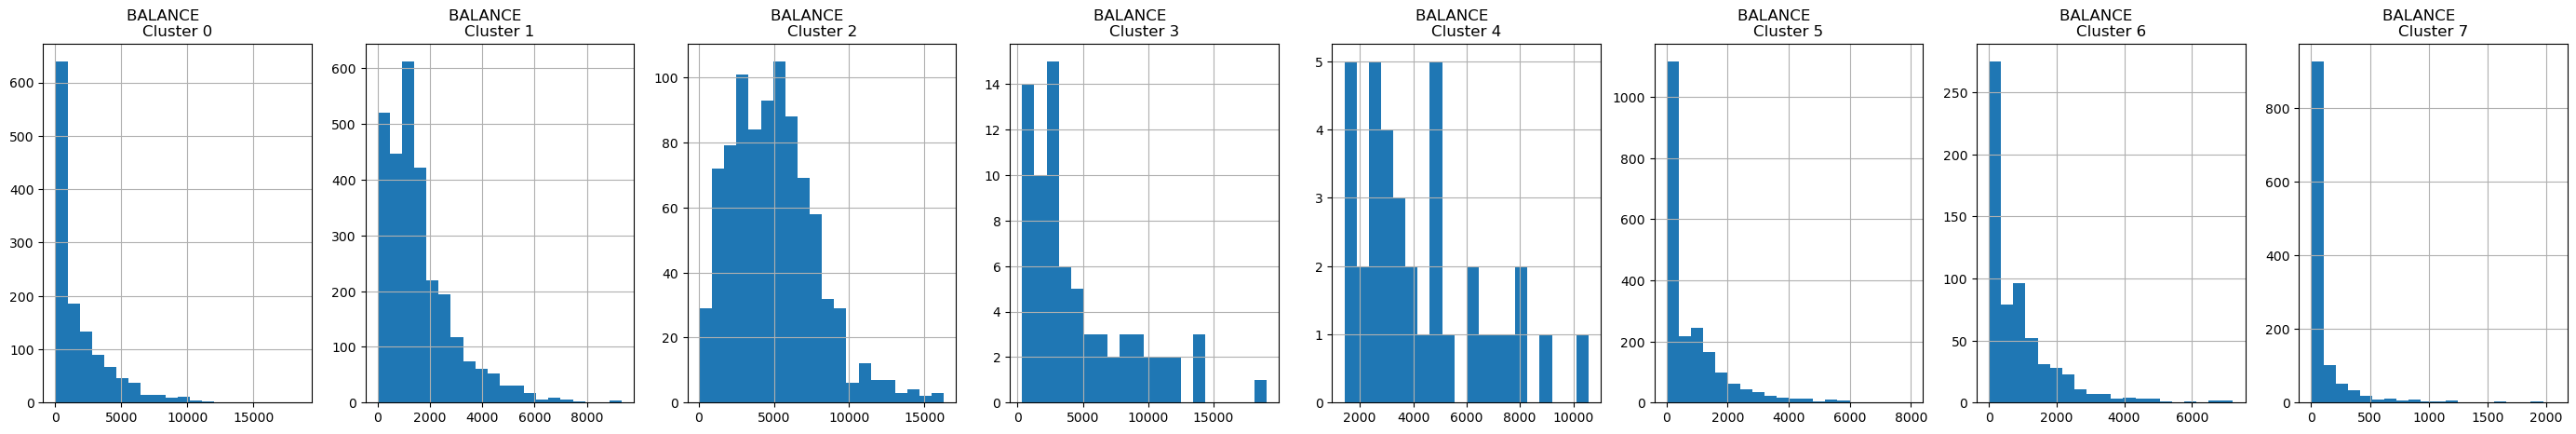

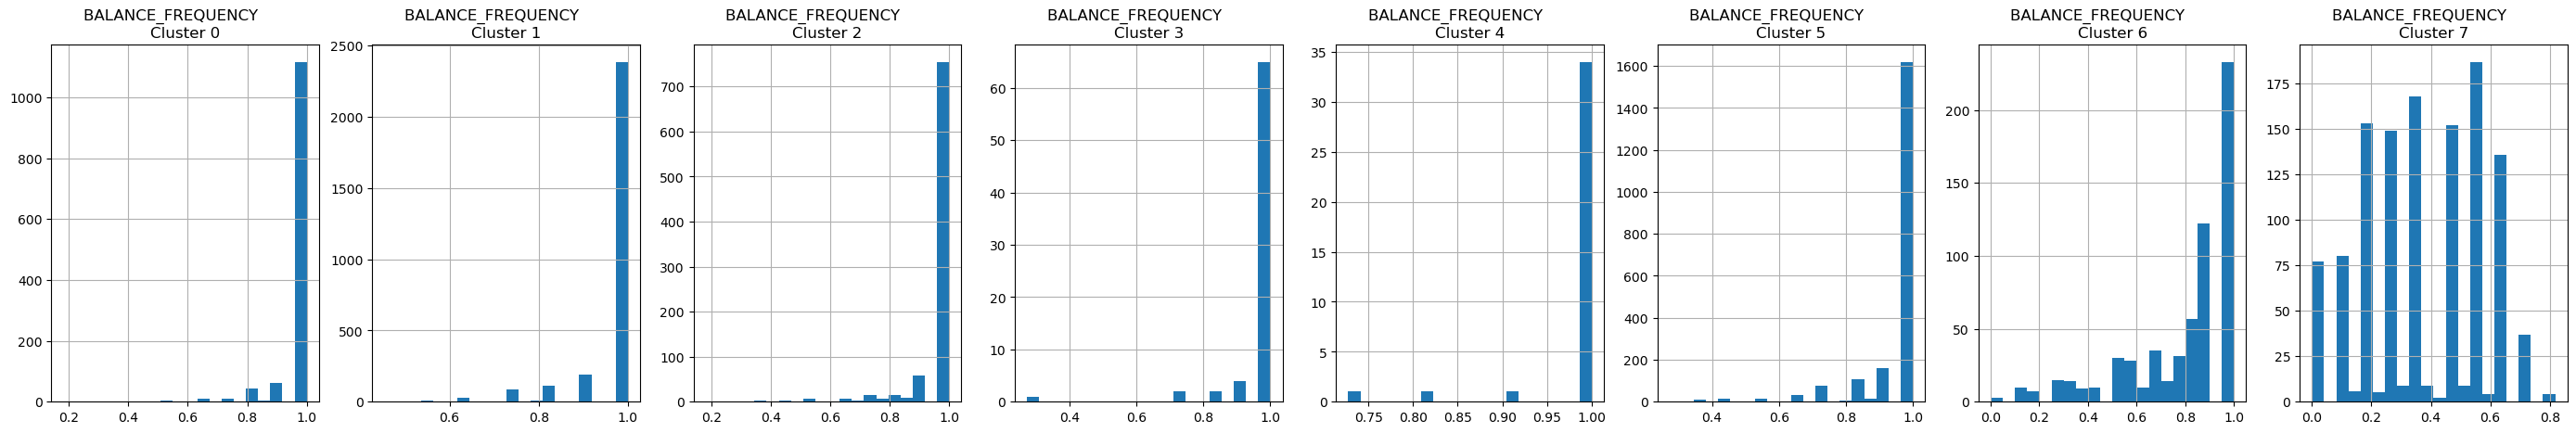

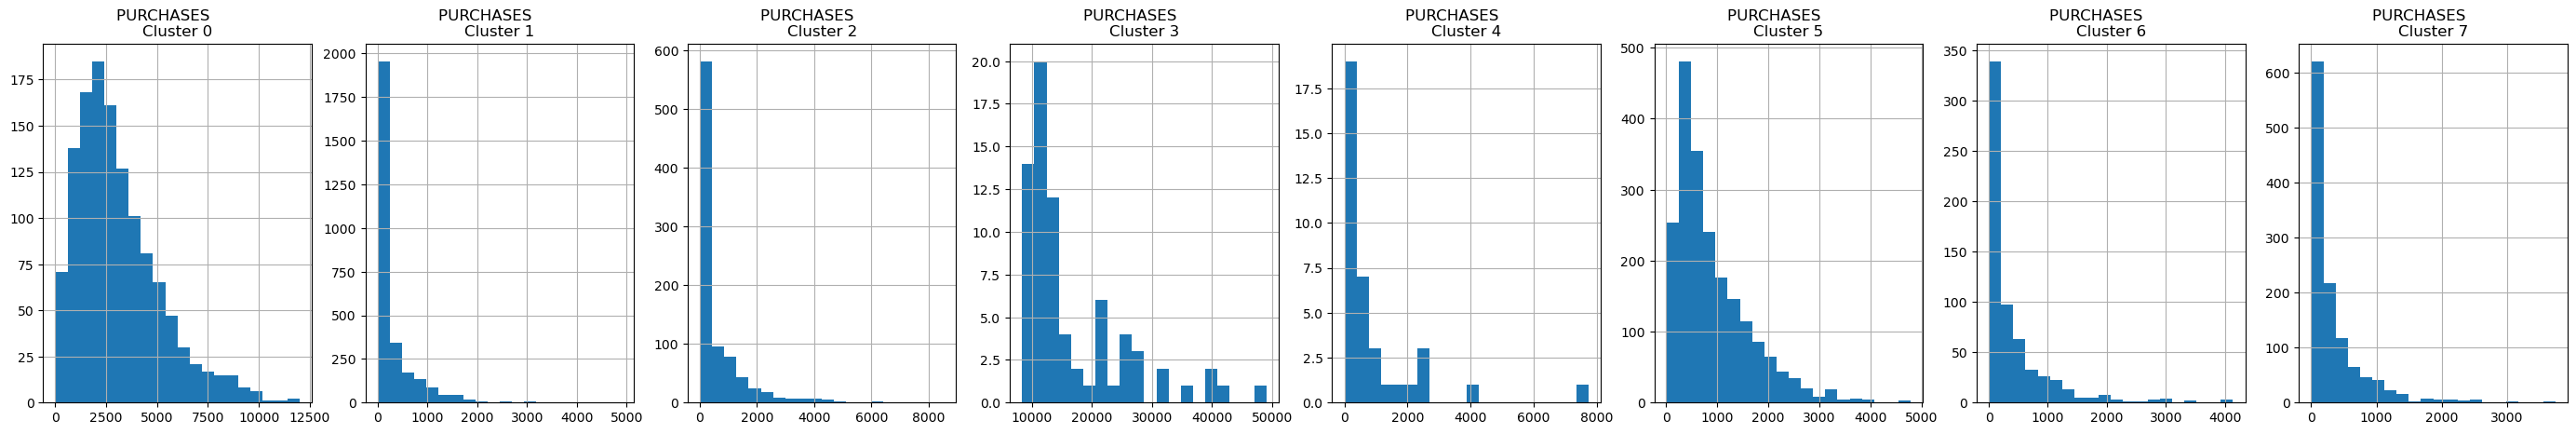

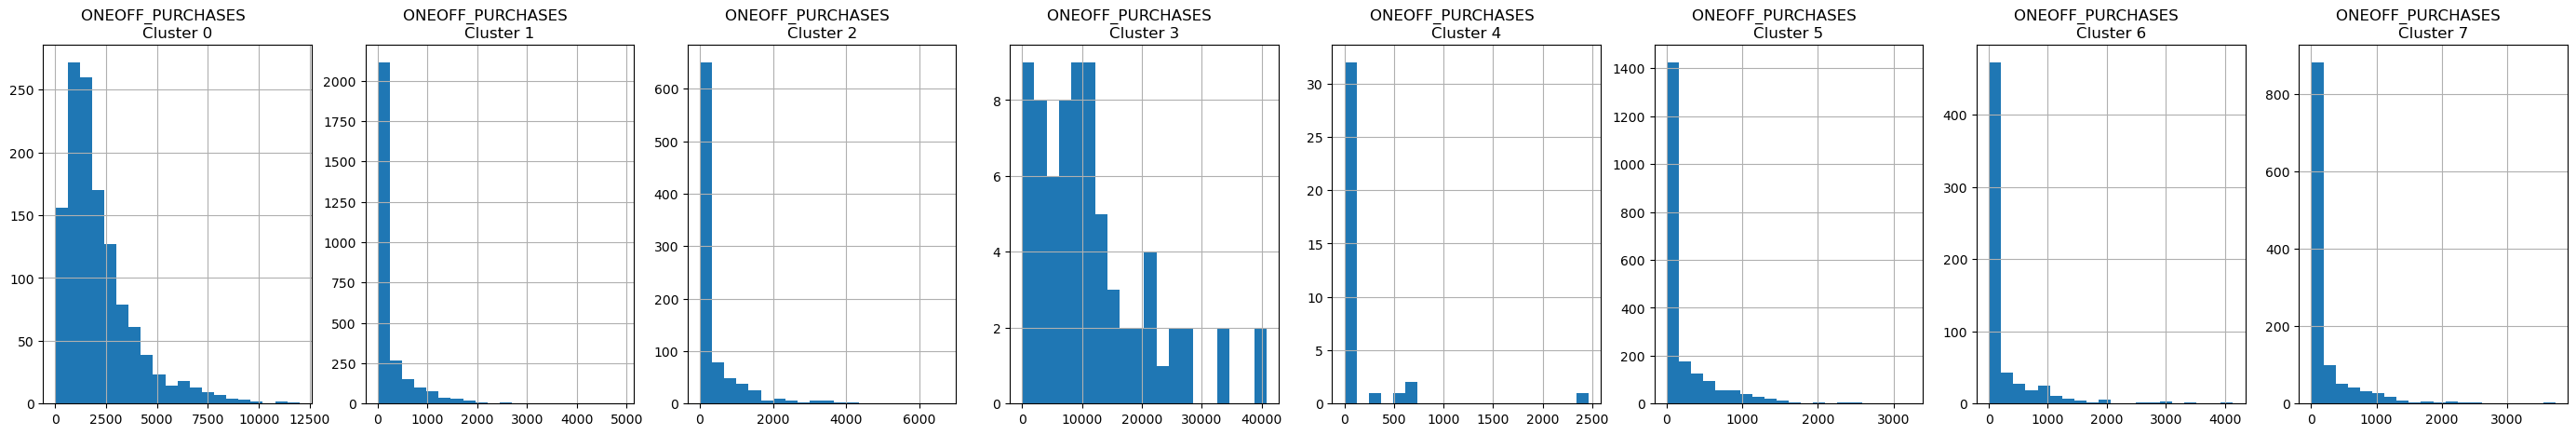

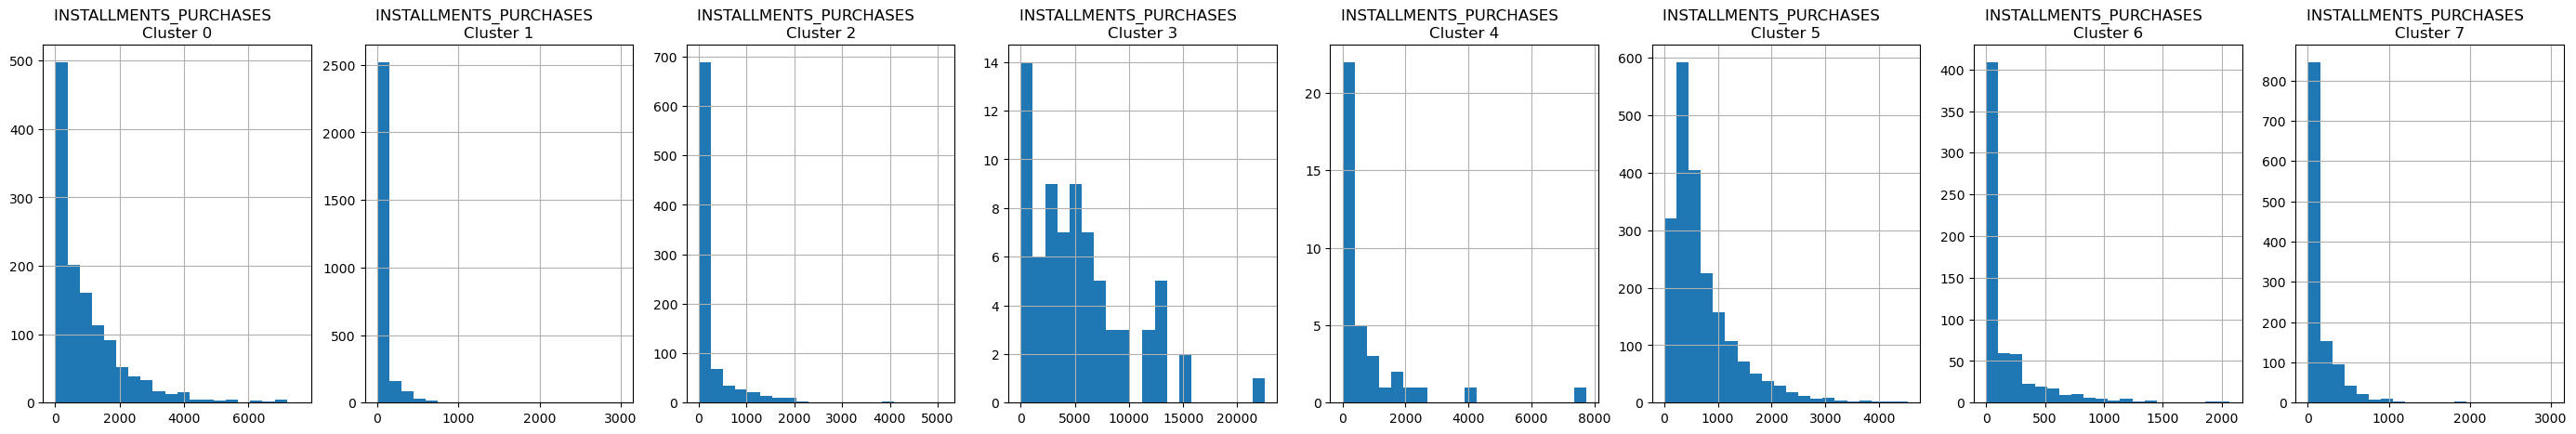

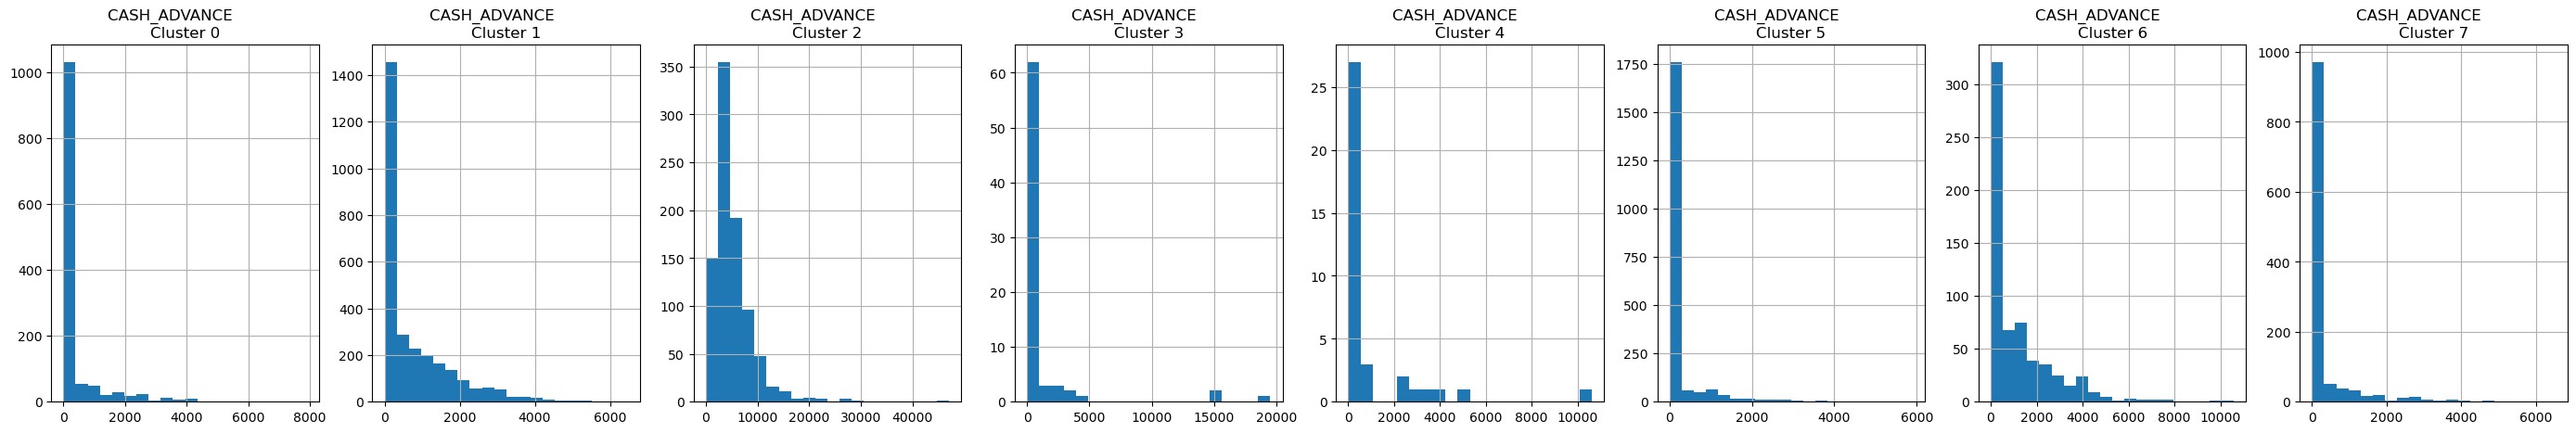

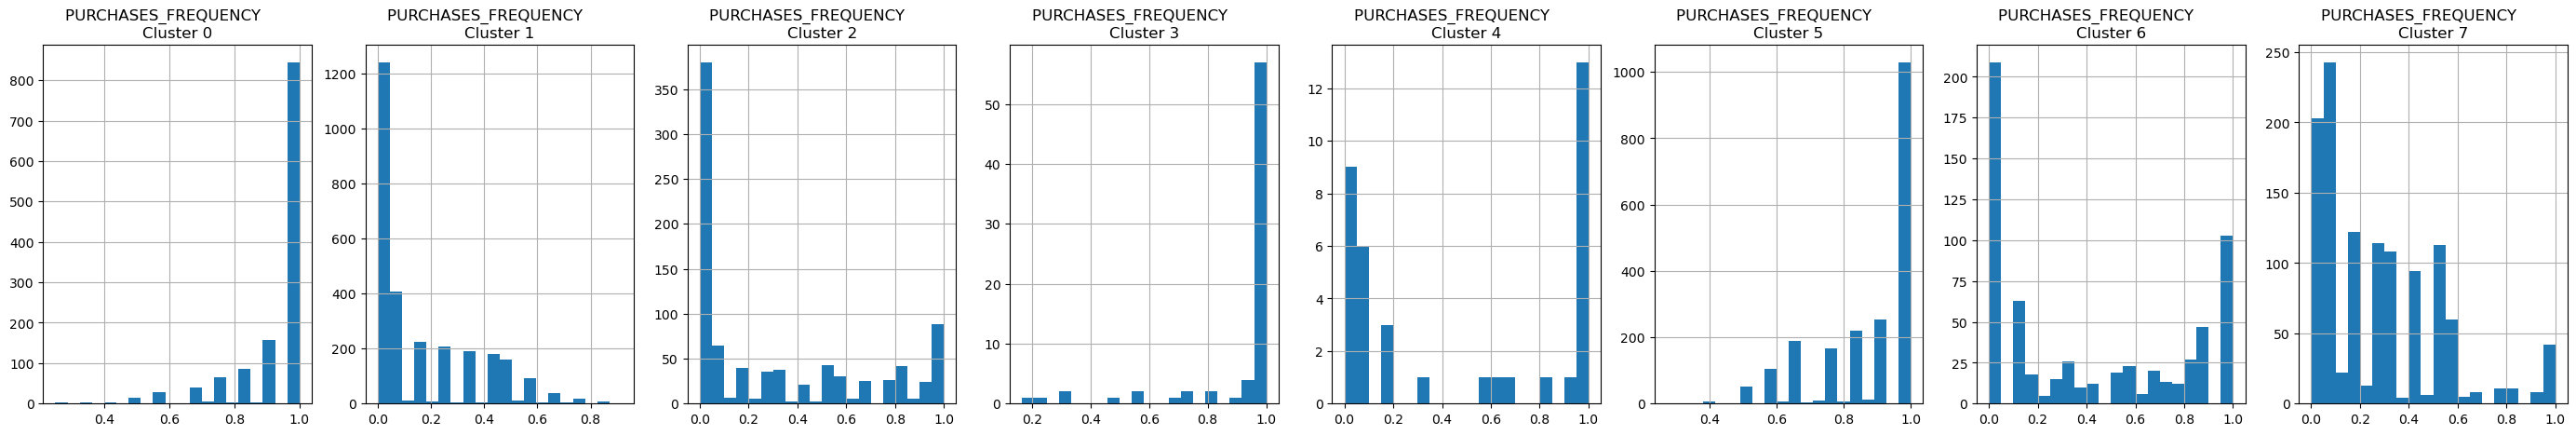

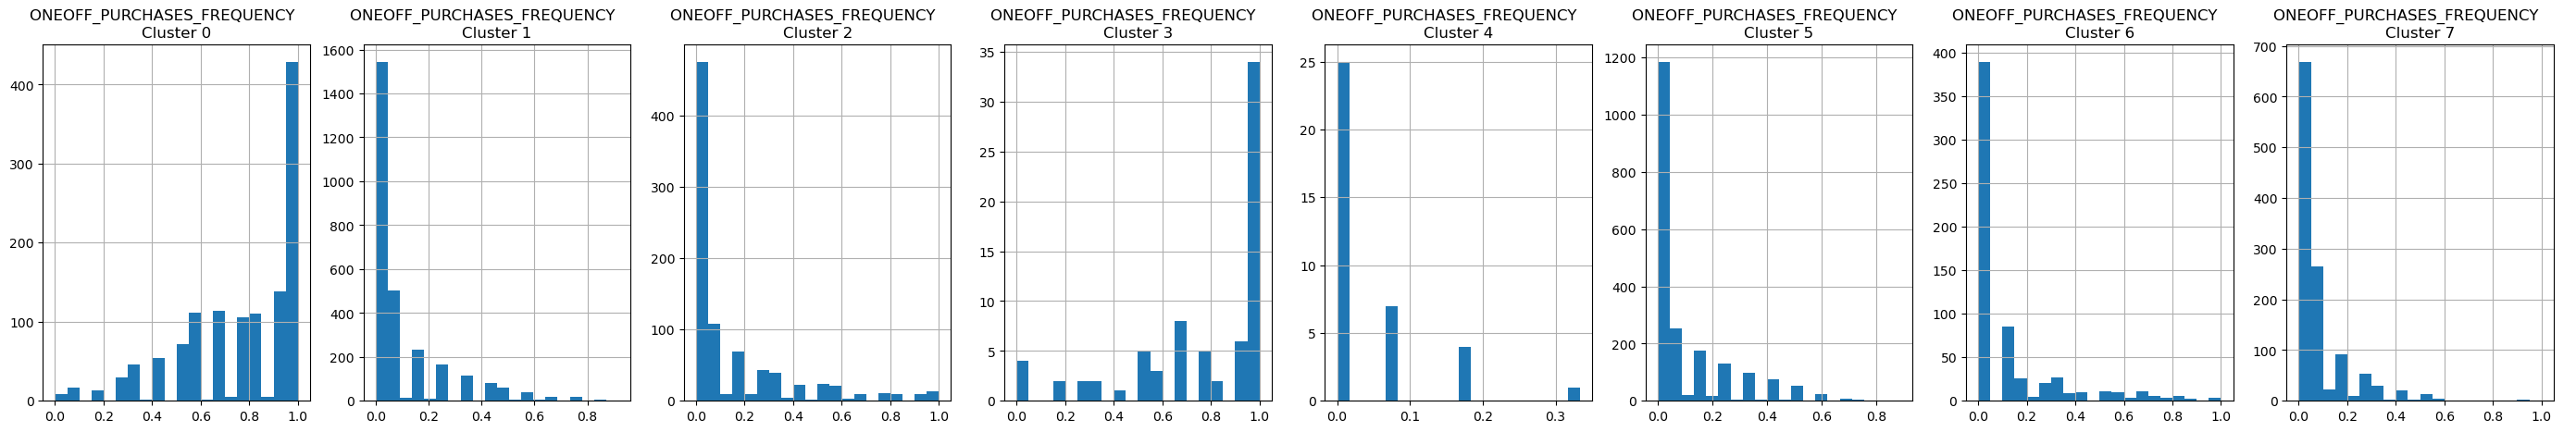

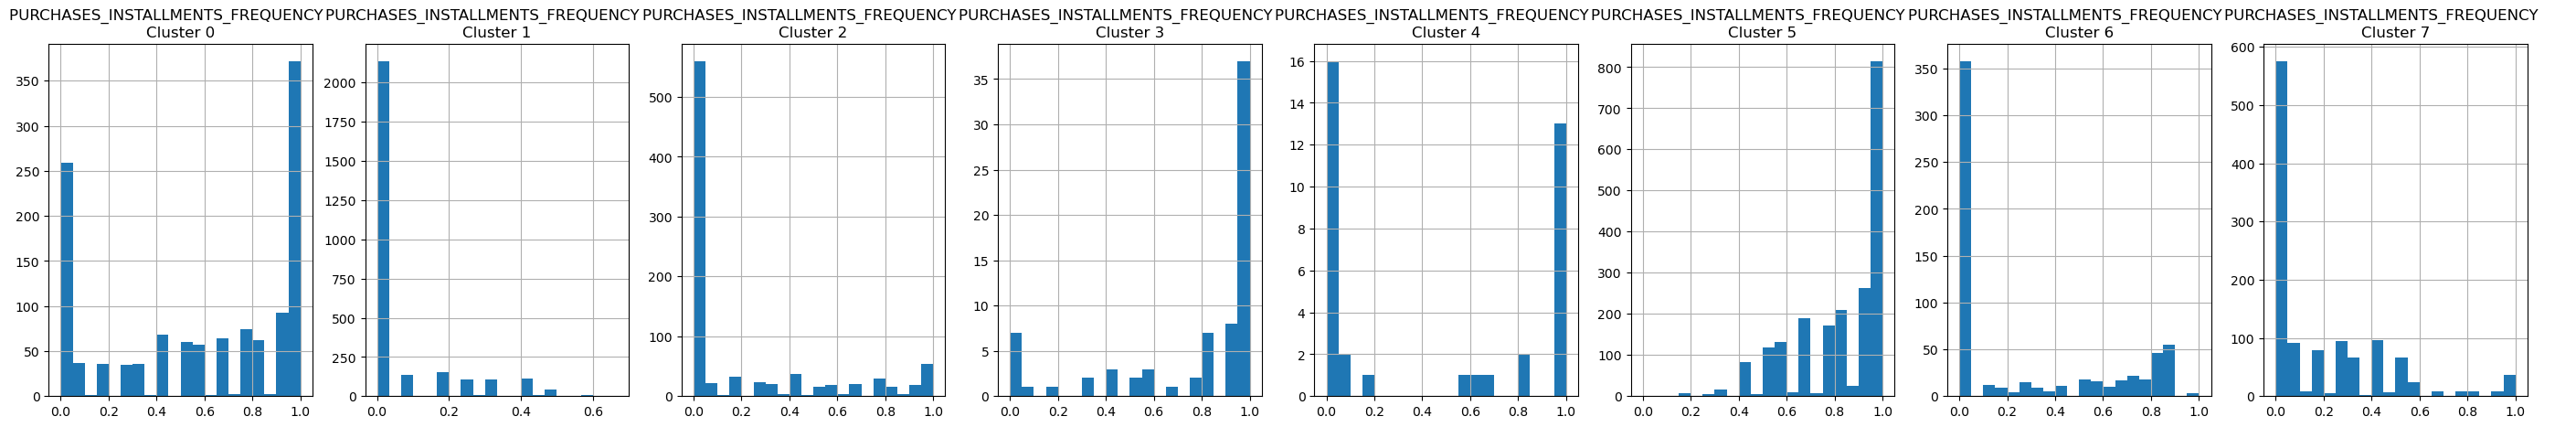

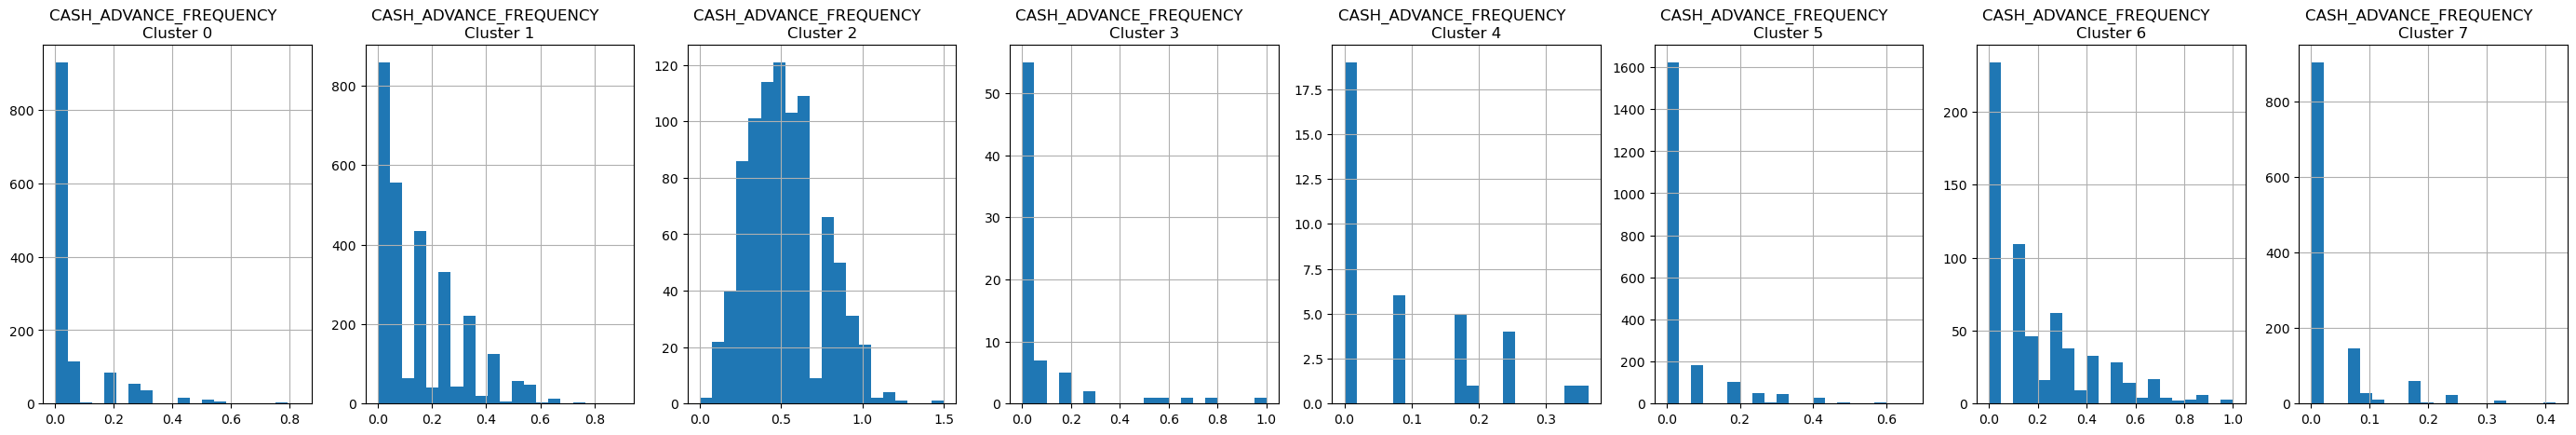

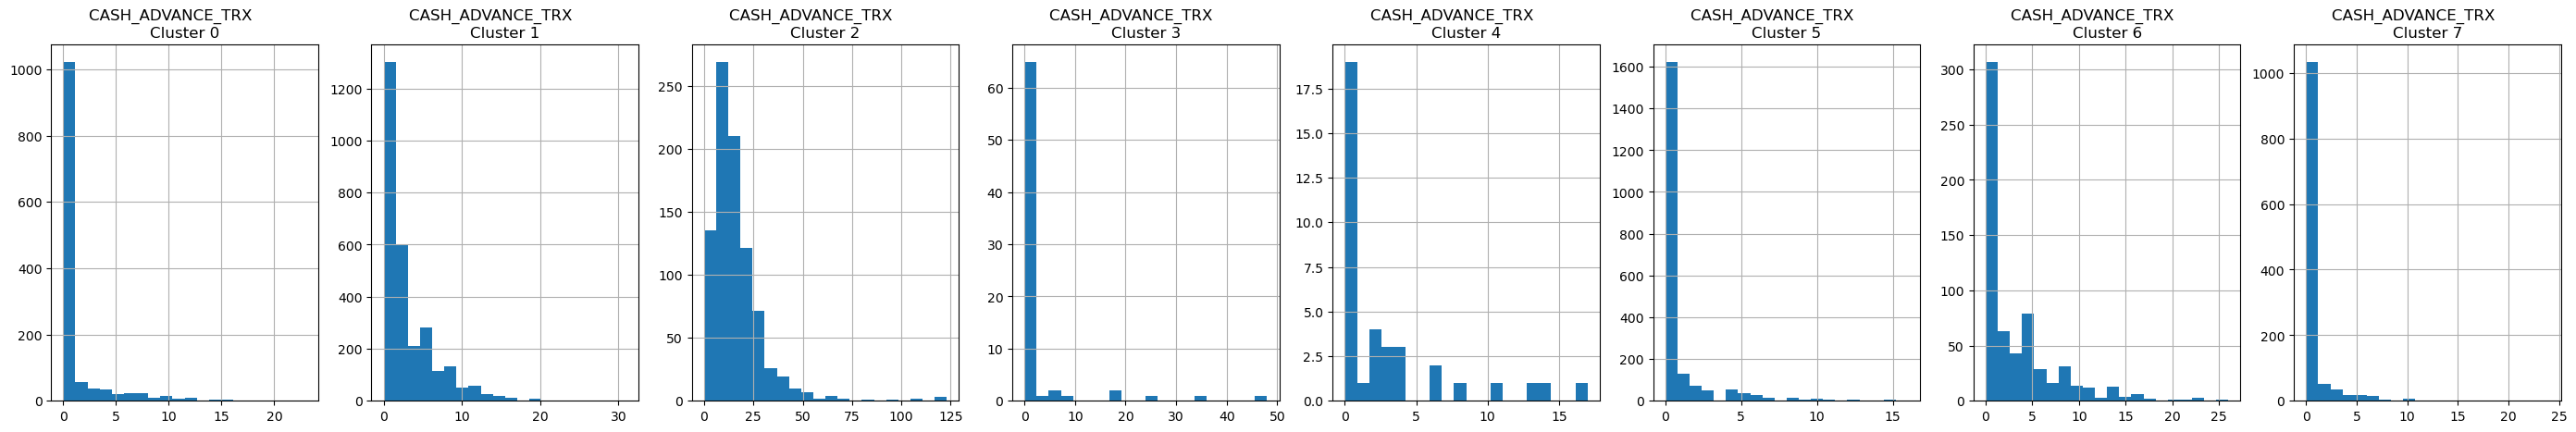

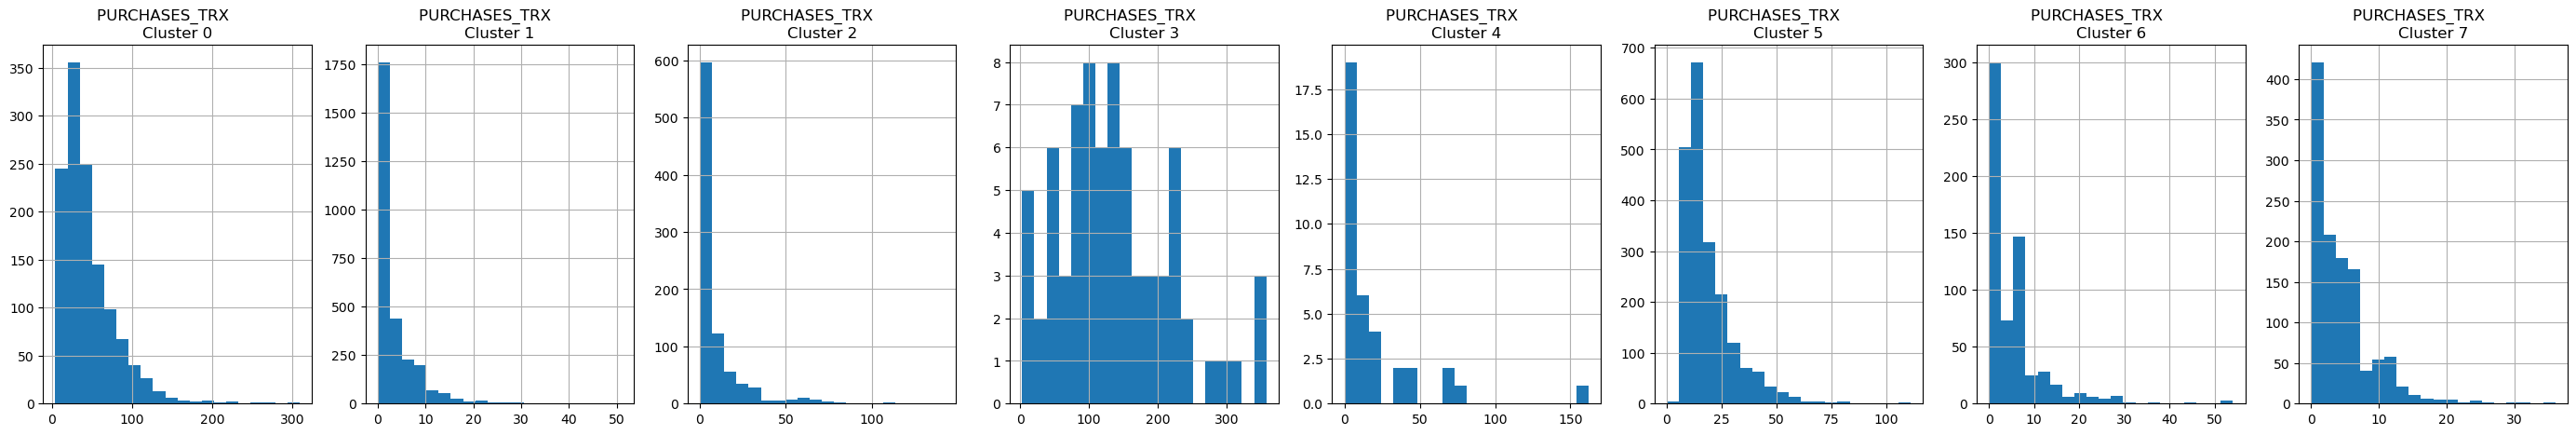

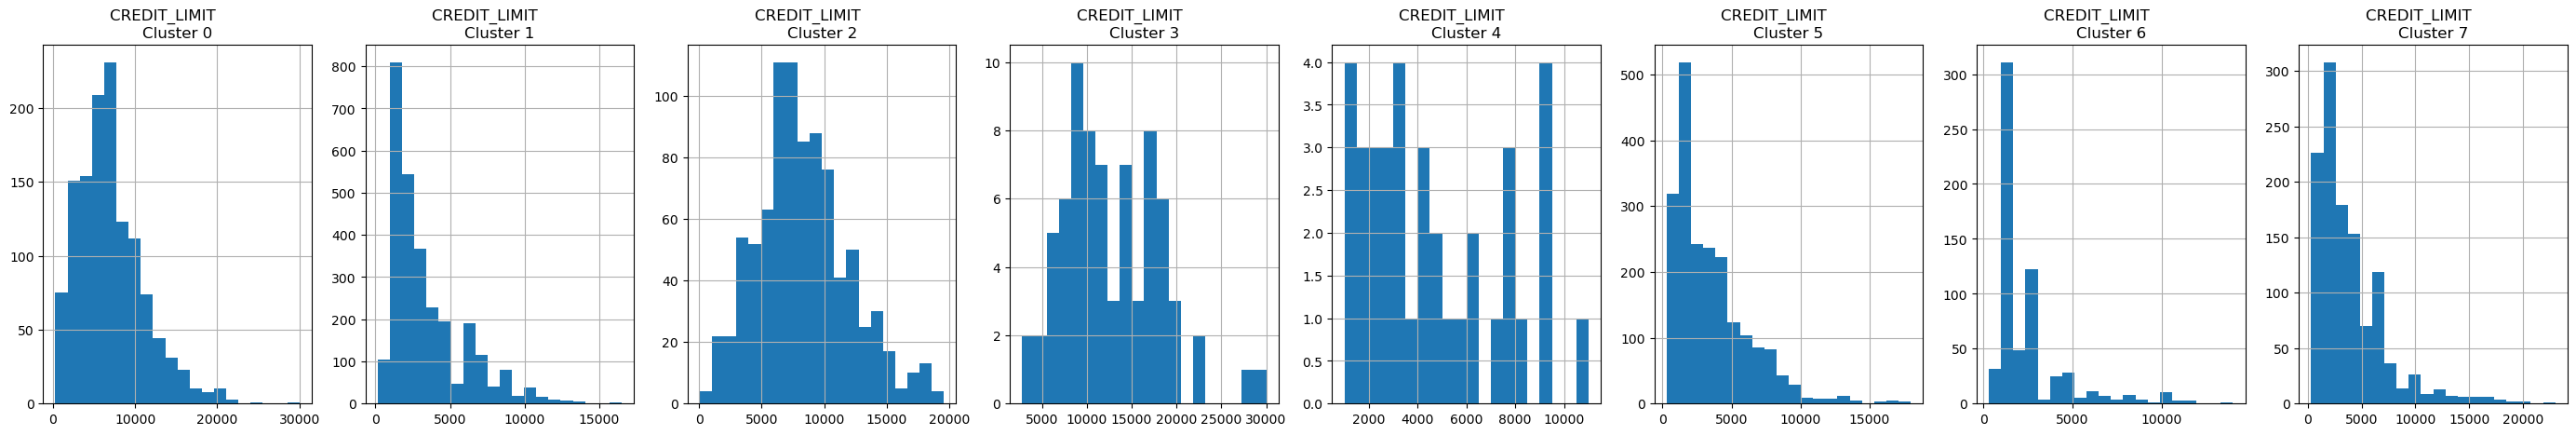

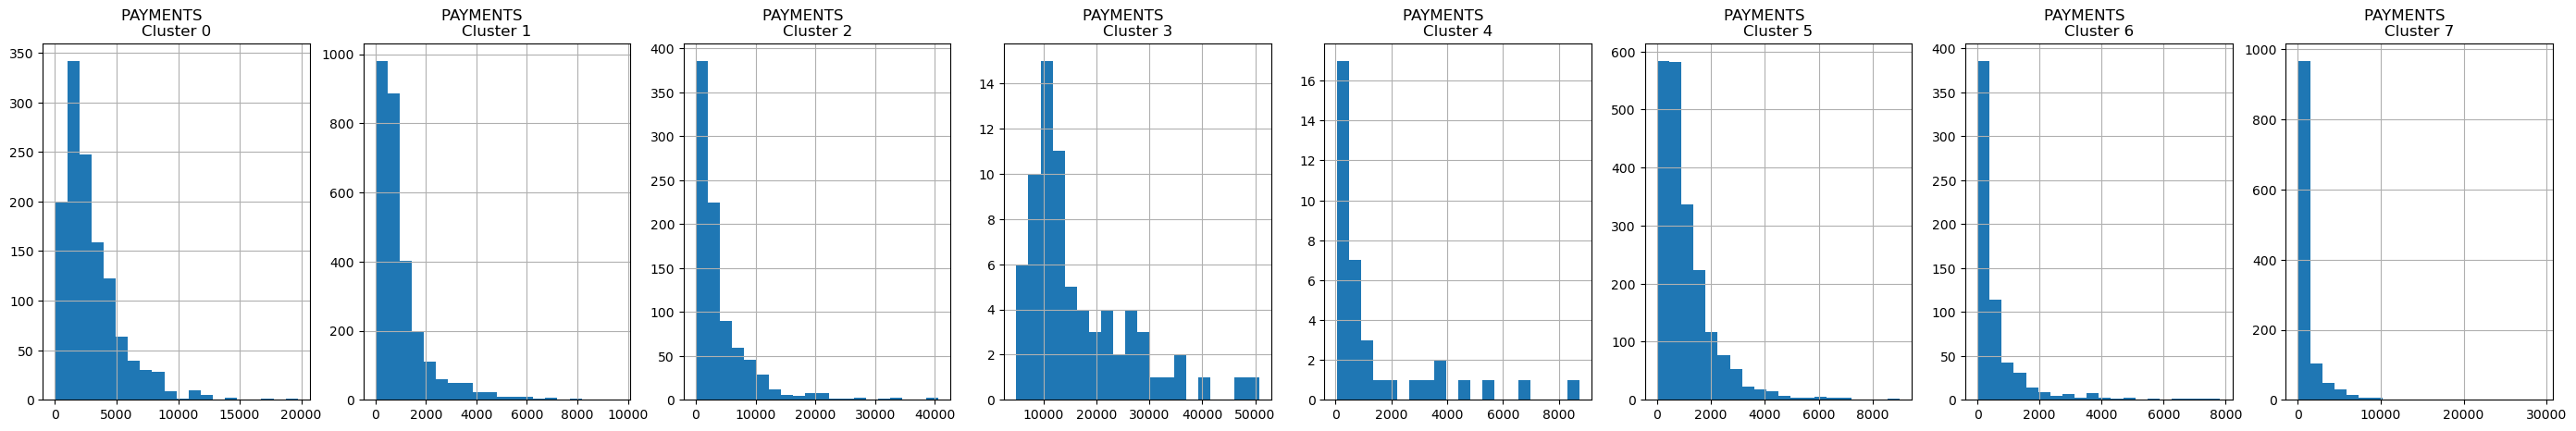

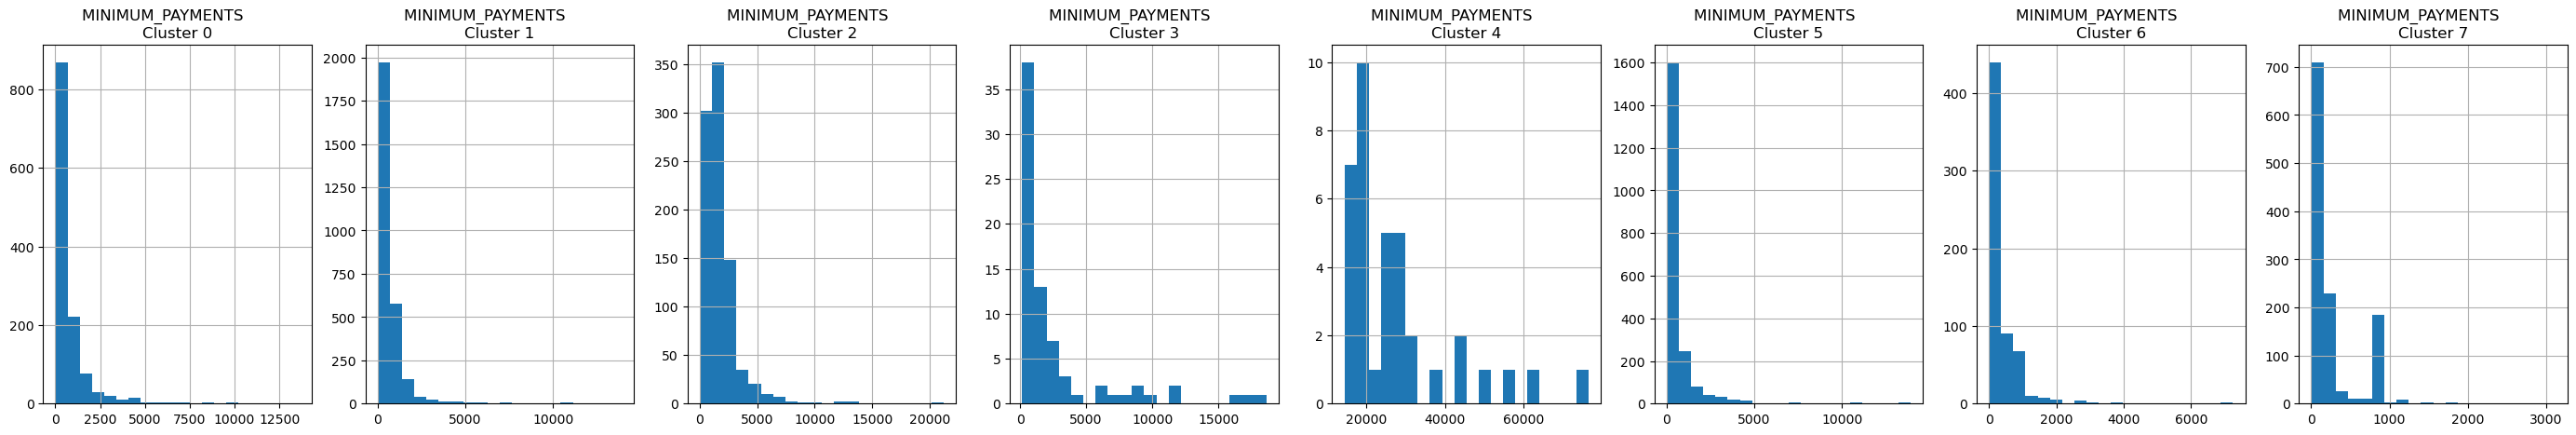

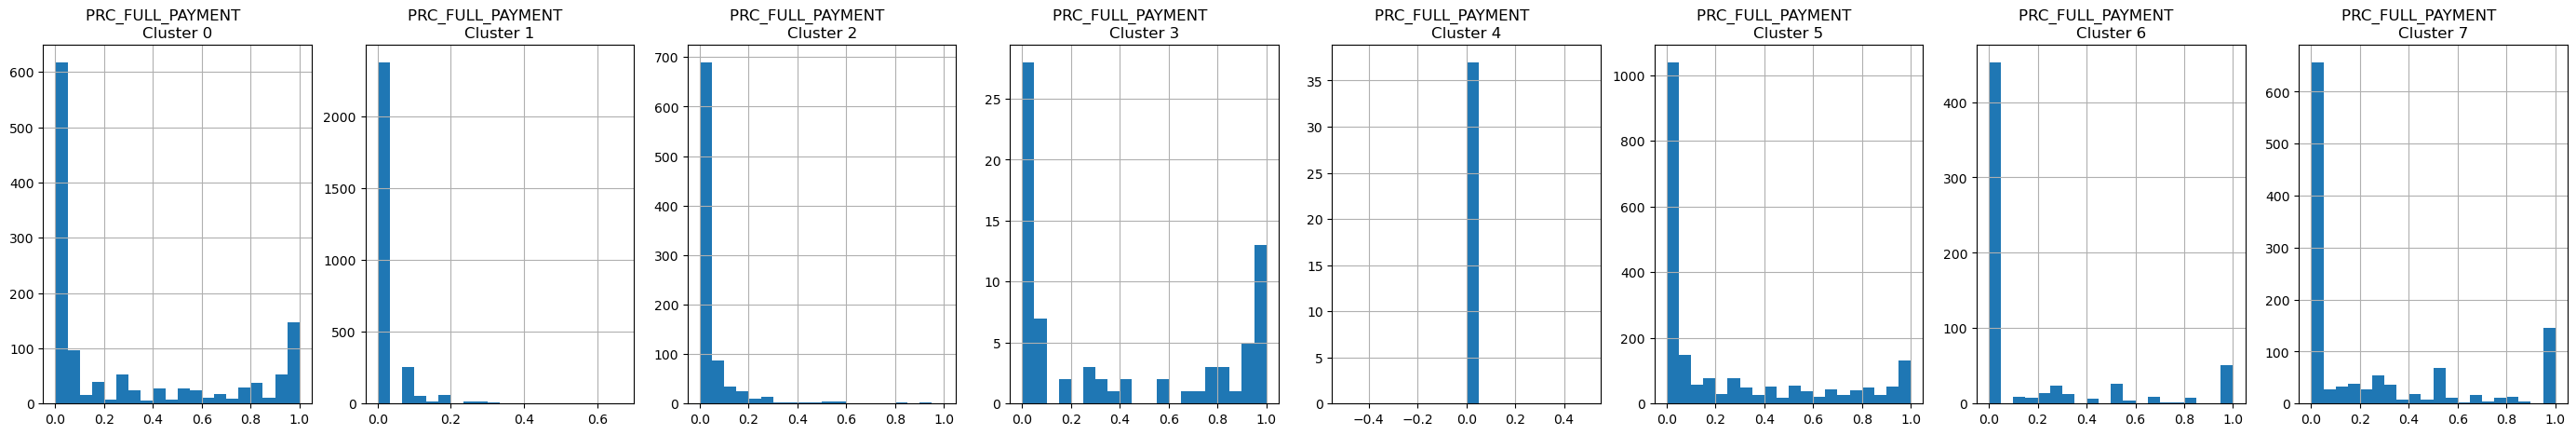

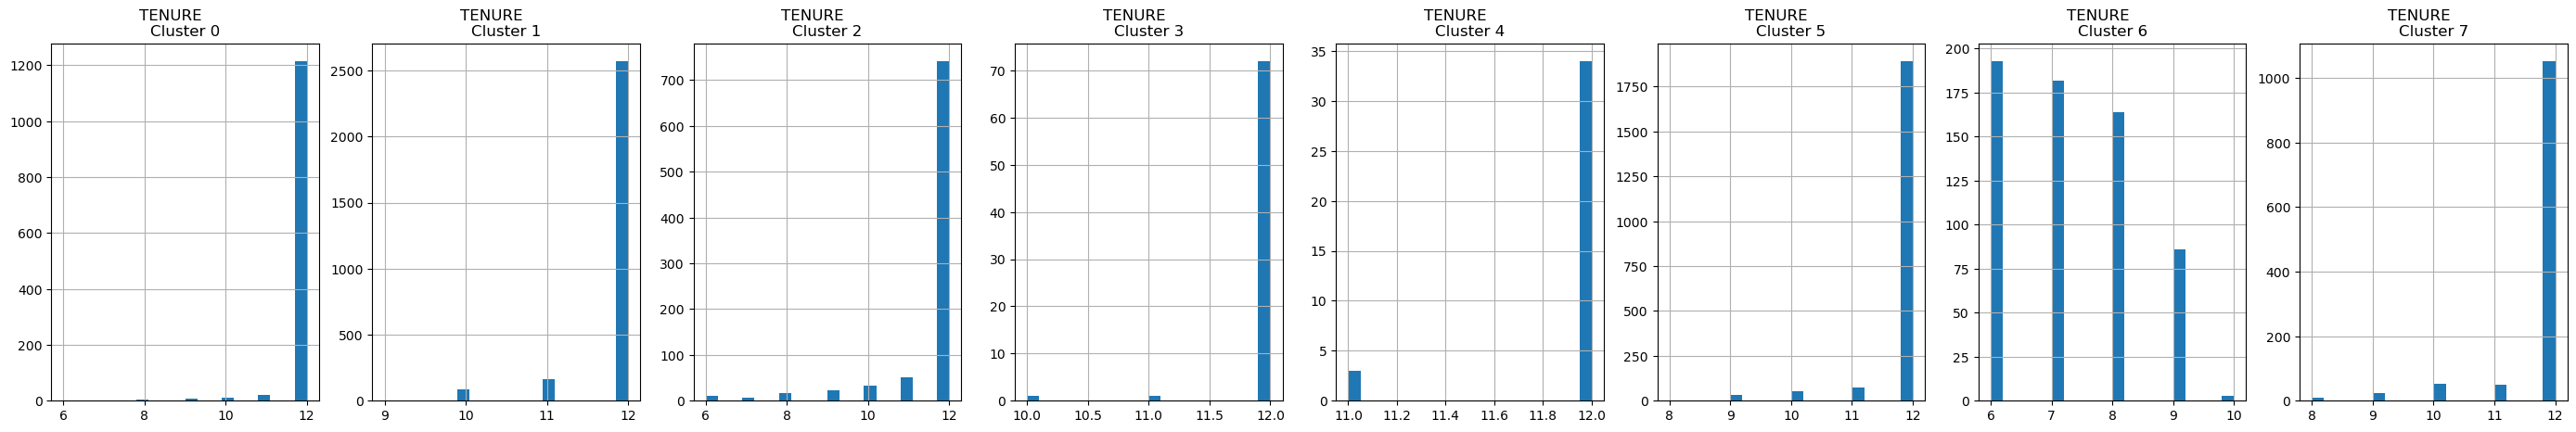

In [41]:
# 1.- Realizaremos un gráfico para cada cluster de cada variable, es decir, 8 gráficos para cada columna.
# 2.- 
for i in df.columns:
    plt.figure(figsize = (35,5)) # grafico
    for j in range(8): # 8 gráficos para cada una de las columnas del bucle anterior
        plt.subplot(1,8,j+1) # dibujar en 1 fila, 8 columnas, donde el actual sea j+1
        cluster = df_cluster[df_cluster['CLUSTER'] == j] # me quedo con los clientes marcados en el cluster j-ésimo
        cluster[i].hist(bins = 20) # dibujamos un histograma para la columna i-ésima, con el número total de divisiones sea de 20, para compararlos graficamente entre sí
        plt.title('{}      \nCluster {}'.format(i,j)) # título para cada gráfico
    plt.show()

# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

## 7.1 Obtener las componentes principales

In [42]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[-1.68222059, -1.0764426 ],
       [-1.13829521,  2.50648961],
       [ 0.96968369, -0.38352787],
       ...,
       [-0.92620391, -1.81078016],
       [-2.33655164, -0.65796065],
       [-0.55642143, -0.40048181]])

## 7.2 Crear dataframe con las componentes principales

In [43]:
pca_df = pd.DataFrame(data = principal_components, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076443
1,-1.138295,2.506490
2,0.969684,-0.383528
3,-0.873628,0.043177
4,-1.599434,-0.688576


## 7.3 Concatenar las componentes principales con las etiquetas de los clusters

In [44]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER':labels})], axis = 1 )
pca_df.head()

,pca1,pca2,CLUSTER
0,-1.682221,-1.076443,1
1,-1.138295,2.506490,2
2,0.969684,-0.383528,0
3,-0.873628,0.043177,1
4,-1.599434,-0.688576,1


## 7.4 Visualización

### 7.4.1 Primer método

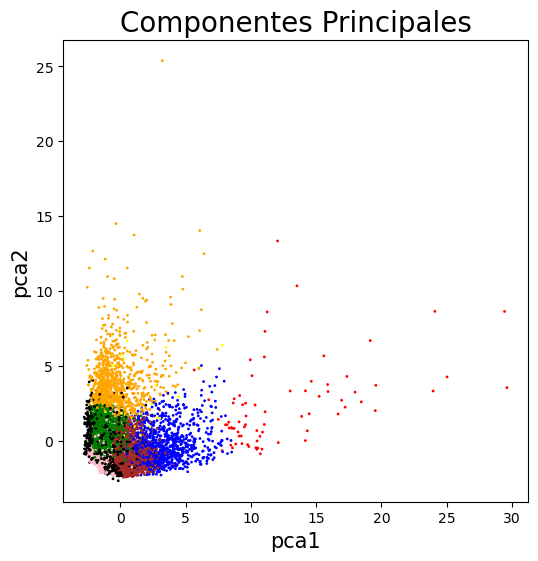

In [45]:
fig = plt.figure(figsize = (6,6)) #creamos una figura de 6x6

ax = fig.add_subplot(1,1,1) #indicamos que haremos solo un gráfico dentro de la figura
ax.set_xlabel('pca1', fontsize = 15) #nombres del eje x
ax.set_ylabel('pca2', fontsize = 15) #nombre del eje y
ax.set_title('Componentes Principales', fontsize = 20) #nombre del gráfico

color_theme = np.array(['blue', 'green', 'orange','red','yellow','brown','black','pink']) #creamos un array con ocho colores para cada cluster
ax.scatter(x = pca_df.pca1, y = pca_df.pca2,
          c = color_theme[pca_df.CLUSTER], s = 1)
#dibujar los puntos que representarán los vinos con scatter
#agregamos los valores de las columnas componentes
#usamos el parámetro c para indicarle los colores que deseamos para los puntos
# esta información se encuentra en KMeans_Clusters del objeto pca_nombres_vinos
# el tamaño de los puntos a graficar será de 50

plt.show()

## 7.4.2 Segundo método

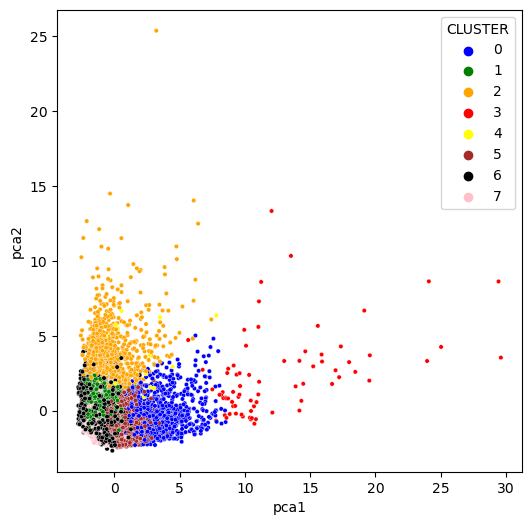

In [46]:
# Mucho más corto que el anterior
plt.figure(figsize = (6, 6))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER', data = pca_df, palette = ['blue', 'green', 'orange','red','yellow','brown','black','pink'], s = 10)
plt.show()

# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1kY4Ol3OvDd4IaFdrGXB8s-vAa1bhsT6V)

![alt text](https://drive.google.com/uc?id=1qtSiLgN_ZYWV_SPD79xpiapkbHxNmqvb)

![alt text](https://drive.google.com/uc?id=13sf_hXzpb2_bctB5EF7w-pXDV_72J95_)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

## 9.1 Importar librerías de Deep Learning (Tensorflow)

In [47]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
# tooodas las bibliotecas importadas en la linea de arriba, son para no crear la arquitectura desde cero
from tensorflow.keras.models import Model, load_model # estas librerías son para cargar y crear nuestro modelo
from tensorflow.keras.initializers import glorot_uniform # a la hora de inicializar nuestras capas, queremos que siga una distribución norma normal truncada. Es parte del inicializador
from keras.optimizers import SGD # stochastic gradient descent: algoritmo que permite que el entrenamiento sea estocástico par no estancarse en soluciones locales si no ir por la solución global. Variante de Gradiente descendiente de Adam.

# Input: entrada, Add: suma, Dense: capa densa, Activation: funciones de activación, ZeroPadding2D, BatchNormalization, Flatten: aplanado, Conv2D: convulación, AveragePooling2D, MaxPooling2D, Dropout: capa dropout

# ZeroPadding2D: Capa de relleno cero para entrada 2D (por ejemplo, imagen). Esta capa puede agregar filas y columnas de ceros en la parte superior,
# inferior, izquierda y derecha de un tensor de imagen.
# BatchNormalization: metodo que normaliza cada lote de datos ( bath_size ). Como vimos en el tutorial de keras es necesario que los datos se
# normalicen para evitar que se tengan distancias muy diferentes entre ellos como en una imagen a color que se pueden tener valores de 0 hasta 255.
# AveragePooling2D: Operación de agrupación media para datos espaciales. Reduce el muestreo de la entrada a lo largo de sus dimensiones espaciales
# (altura y anchura) tomando el valor promedio sobre una ventana de entrada (de tamaño definido por ) para cada canal de la entrada. La ventana se
# desplaza a lo largo de cada dimensión.
# MaxPooling2D: MaxPooling2D(pool_size= (2, 2)) Esta capa aplica un filtro que reduce la dimensionalidad de la imagen, esto es, la hace más pequeña.
# El objetivo es, por un lado, reducir el coste computacional. Además se minimiza la posibilidad de overfitting y se consigue aumentar la abstracció
# sobre los datos de entrada.

## 9.2 Programar la arquitectura del Modelo Neuronal "Autoencoder".

#### Objetivo: la idea es tener menos datos que al inicio para que al usar el algoritmo de Kmeans, obtengamos mejores resultados

### 9.2.1 Crear la arquitectura

In [48]:
# Tenemos 17 características. Así que vamos a codificar hasta llegar a algo, por que no, intermedio. Por ejemplo: 7 variables.
encoding_dim = 7

# Entregamos la cantidad de dimensiones que tiene nuestro data set (17 variables, 17 características, 17 columnas). Primer parámetro: filas. Segundo
# parámetro:  como el número de observaciones puede variar y como será estocástico, se entrenará por lotes, de 2 en 2, de 7 en 7 o incluso de tamaño
# variable, mantendremos el segundo parámetro vacío.
input_df = Input(shape = (17, ))

# Escribiremos el codificador por un lado y el descodificador por el otro

#Crear la primera capa completamente conectada (densa) que va a mapear nuestra información (input dimensión = encoding_dim) en encoding_dimension,
# usando una función de activación igual al rectificador lineal unitario y esto se lo aplicaremos a la información de entrada 'input_df'.
x = Dense(encoding_dim, activation = 'relu')(input_df)
# Partimos de esta forma ingresando nuestros datos de entrada en la primera capa, tomando grupos de usuarios de 17 en 17 para poder entrenar, por lo tanto,
# input_df será mapeada a la dimensión de codificación 'encoding_dim'

# Ahora  solo iremos reconstruyendo la información paultainamente, muy paulatinamente, a través de diferentes capas ocultas. Comenzamos nuestra compresión
# capa tras capa.

x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x) # glorot acostumbra a dar buenos resultados
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
# Observación: Glorot normal es un inicializador (también llamado Xavier normal initializer) que toma muestras aleatorias de una distribución normal
# truncada. Esta función, a la hora de inicializar los pesos, va a ser la función clave.

# Hemos llegado al estadio intermedio, a la verisión codificada a la que se le aplicara una última capa densa.
encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x) # capa central aplicada a x, es decir, a las 2000 capas anteriores

# comenzamos con la descompresión, comenzando con 2000 capas.
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

# Según el profesor del curso, no es necesario que sea 100% simétrico el proceso, ya que aparece un pequeño problema: puede pasar la  información de una
# capa a la siguiente, y de esta a la siguiente y que nunca se romperan estas relaciones. Es decir, los datos podrían pasar solo por unas pocas neuronas,
# ir copiánadose, y a pesar de que se ha reducido al inicio, podríamos caer en la MULTICOLINEALIDAD hemos pasado volver a crear otro estadio de 500
# neuronas.

# Entonces, nos saltaremos la última capa e iremos directamente a la descodificación (decoded):
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

### 9.2.2 Crear modelo y compilarlo.

In [49]:
# Modelo que partirá del modelo "input_df" (primer parámetro) hasta la capa "decoded" (segundo parámetro): 
autoencoder = Model(input_df, decoded)

# Si queremos utilizar la primera parte solo para comprimir, creamos un segundo modelo que a partir del "input_df" llegue solo hasta la zona del medio:
# primer parámetro: inicio, segundo parámetro: centro (por eso le dimos un nombre especial a la capa central, para tener un modelo con la info
# decodificada y otro con la info codificada)
encoder = Model(input_df, encoded)

# Finalmente ajustamos o compilamos el modelo autoencoder utilizando el optimizador Adam, con la función de pérdidas MeanSquareError.
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [50]:
# Presentar el resumen de las variables
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

### 9.2.3 Entrenar el modelo

In [51]:
# Le entregamos nuestra información de entrada al modelo para realizar el entrenamiento.
# 1.-Parámetro 1: info que tenemos
# 2. Parámetro 2: info que queremos predecir (la misma que tenemos de entrada)
# 3.- Entrena en lotes de 128 (batch), pora que tome de 128 en 128 a los clientes
# 4.- Al ser una red neuronal tiene que pasar varias veces por nuestros datos, por lo que el número de epochs tiene que ser al menos de 25
# 5.- Verbose = 1 para ver que e s lo que se obtiene de manera paulatina
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs=25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 32ms/step - loss: 0.5710
Epoch 2/25
70/70 [==============================] - 3s 36ms/step - loss: 0.3032
Epoch 3/25
70/70 [==============================] - 3s 40ms/step - loss: 0.2181
Epoch 4/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1864
Epoch 5/25
70/70 [==============================] - 2s 32ms/step - loss: 0.1657
Epoch 6/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1451
Epoch 7/25
70/70 [==============================] - 2s 32ms/step - loss: 0.1349
Epoch 8/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1253
Epoch 9/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1214
Epoch 10/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1092
Epoch 11/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1050
Epoch 12/25
70/70 [==============================] - 2s 33ms/step - loss: 0.0999
Epoch 13/25
70/70 [==================

### 9.2.4 Guardar la arquitectura y pesos.

In [52]:
# Guardar los pesos para hacer predicciones y el algoritmo de kmeans, donde en vez de hacer el clustering con los datos originales vamos a usar la
# información ya mapeada y reducida a tamaño de dimensión 10 (cantidad de variables).
autoencoder.save_weights('autoencoder.h5') # estandar de redes neuronales para guardar arquitecturas y pesos

# Para cargar este fichero solo debemos escribir autoencoder.load_weights('autoencoder.h5')

## 9.3 Predicción con 10 Variables.

### 9.3.1 Predicción.

In [53]:
# Realizaremos una predicción con la codificación (es decir, a la mitad con el "encoded"), ya que el objetivo siempre ha sido reducir las variables.
# Es obligatoro que los datos sean los escalados.
# Con esto obtendremos una nuevo dataset
pred = encoder.predict(df_scaled)
pred

280/280 [==============================] - 2s 5ms/step


array([[0.        , 0.18758698, 0.        , ..., 0.24240388, 0.        ,
        0.        ],
       [0.        , 2.4564774 , 0.        , ..., 0.27233756, 0.        ,
        0.        ],
       [0.        , 0.5778895 , 0.        , ..., 0.34469202, 0.        ,
        0.        ],
       ...,
       [0.        , 0.58622605, 0.        , ..., 2.6231356 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.7300338 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.0765393 , 0.        ,
        0.        ]], dtype=float32)

In [54]:
# revisamos
pred.shape

(8950, 10)

### 9.3.2 Aplicar la técnica del Codo de Jambú para obtener los n-clusters.

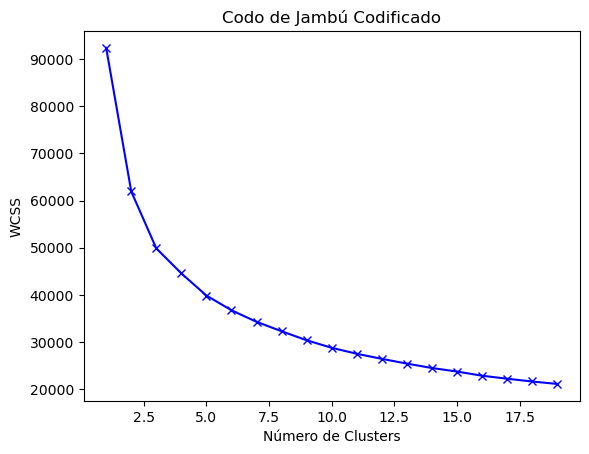

In [55]:
wcss2 = [] # en este punto volví al codo anterior para cambiar el nombre por wcss1 y wcss2

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(pred) # Aquí se aplica K-means a la base de datos codificada
    wcss2.append(kmeans.inertia_)

plt.plot(range(1,20),wcss2, 'bx-')
plt.title('Codo de Jambú Codificado')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

### Observaciones y Conclusión.
##### 1.- Con el gráfico podemos ver que en x = 4 es donde comienza a disminuir la violencia con la que cae curva.
##### Por lo tanto, Usaremos 4 clusters.

### 9.3.4 Comparación del Primer Codo con el Segundo. 

C:\Users\Danko\AppData\Local\Temp\ipykernel_12536\3334045615.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1,20), wcss1, 'bx-', color = 'r')
C:\Users\Danko\AppData\Local\Temp\ipykernel_12536\3334045615.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1,20), wcss2, 'bx-', color = 'g')


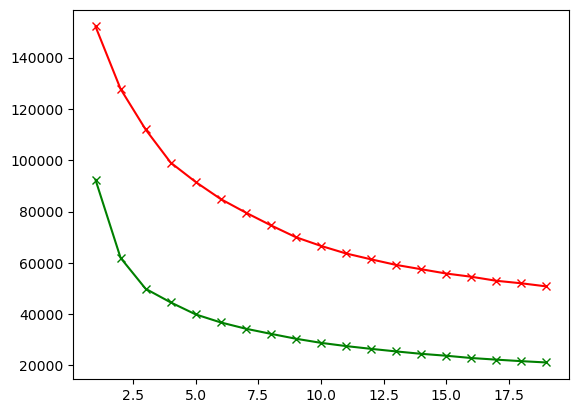

In [56]:
plt.plot(range(1,20), wcss1, 'bx-', color = 'r')
plt.plot(range(1,20), wcss2, 'bx-', color = 'g')

### Observaciones y Conclusión.
##### 1.- Se observa que el gráfico wcss2 cae más verticalmente que wcss1.
##### 2.- En wcss2, del cluster 5 en adelante se observa una linealidad, sin embargo en wwcs es a partir del cluster 8.
##### 3.- El profesor del curso piensa que en wcss2 en adalante comienza la linealidad.
##### Por lo tanto, Usaremos 4 clusters.

### 9.3.5 Generación del modelo K-means.

In [57]:
kmeans = KMeans(4) # creación modelo
kmeans.fit(pred) # entrenamiento del modelo usando el dataset de 10 variables
labels = kmeans.labels_ # guardamos las etiquetas que creó el modelo en labels
y_kmeans = kmeans.fit_predict(pred) # variable para la predicción de a qué cluster pertenece cada cliente (a partir del dataset "pred")

In [58]:
# creamos un dataset de dimensión reducida (dr)
df_cluster_dr = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [59]:
# Analisis de componentes principales.
pca = PCA(n_components = 2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.088155,0.015008
1,1.533273,1.325701
2,-0.850048,-0.278650
3,-0.878770,-0.009308
4,-2.075203,0.146542


In [60]:
# Agregar los clusteres al dataframe anterior
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.088155,0.015008,3
1,1.533273,1.325701,0
2,-0.850048,-0.278650,3
3,-0.878770,-0.009308,3
4,-2.075203,0.146542,3


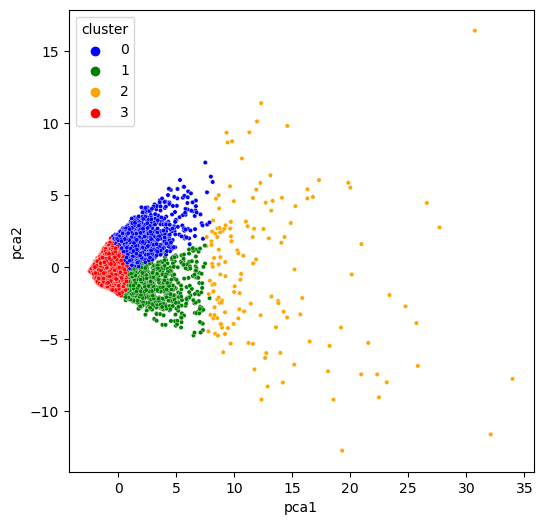

In [61]:
# Visualización
plt.figure(figsize = (6, 6))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['blue', 'green', 'orange','red'], s = 10)
plt.show()

## Conclusión:
##### En el segundo gráfico, podemos observar una mejor segmentación y fronteras claramente establecidas, por lo que nos quedaremos con
##### el Autoencoder.

In [62]:
# Problema para finalizar. No se tiene certeza de qué tipo de clientes posee cada grupo. Le escribí una pregunta al profe, ojalá la responda.